In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import scipy as sy
from scipy.integrate import odeint
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/traitlets/traitlets.py", line 632, in get
    value = obj._trait_values[self.name]
            ~~~~~~~~~~~~~~~~~^^^^^^^^^^^
KeyError: '_control_lock'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 340, in dispatch_control
    async with self._control_lock:
               ^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/traitlets/traitlets.py", line 687, in __get__
    return t.cast(G, self.get(obj, cls))  # the G should encode the Optional
                     ^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-

Starobinsky potential:
$$
V(\phi)=V_0 (1-e^{-\sqrt{\frac{2}{3}}\phi})^2

$$

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2292/2720082845.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Starobinsky potential $V(\phi)$ vs scalar field $\phi$')


Text(0.5, 1.0, 'Starobinsky potential $V(\\phi)$ vs scalar field $\\phi$')

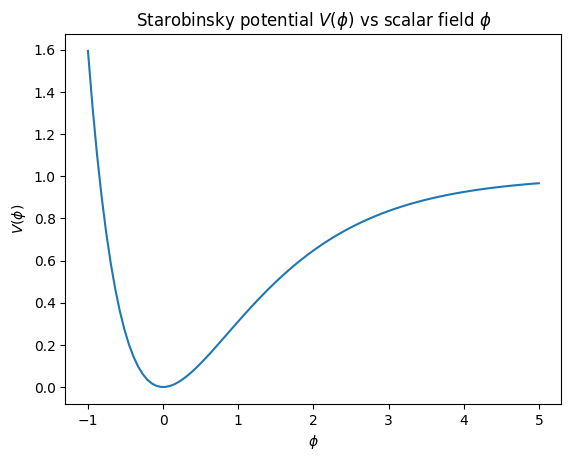

In [2]:
#Starobinsky potential model
phi = np.linspace(-1,5,100)
V_0= 1
V=V_0*(1-np.exp(-((2/3)**0.5)*phi))**2 
plt.plot(phi,V) 
plt.xlabel(rf"$\phi$")
plt.ylabel(rf"$V(\phi)$")
plt.title('Starobinsky potential $V(\phi)$ vs scalar field $\phi$')

The system of equations used are: 
$$
\dot{H}=-H^2+\frac{\ddot{a}}{a}~~~~ Raychaudhuri~Equation \\
\dot{\rho} +3H\rho (1+\omega_b) =0~~~~ Continuity~Equation \\
\ddot{\phi} +3H\dot{\phi} +V_{,\phi}~~~~Klien-Gordon~~Equation
$$

which will be transformed using dimensionless variables:
$$
x=\frac{\dot{\phi}}{\sqrt{6}H} ~~the~kinetic~term\\
y=\frac{\sqrt{V}}{\sqrt{3}H}~~~potential~ term\\
z=\frac{\sqrt{\rho_b}}{\sqrt{3}H}~~barotropic~fluid~density~ term\\
\lambda = -\frac{V_{,\phi}}{V} ~~dimensionless~gradient~slope~of~the~potential
$$
Therefore the dynamical system becomes dimnesionless and plotable in phase space. The dimensionless equations are now given as:
$$
x' =
-3x
+ \sqrt{\frac{3}{2}} \lambda y^2
+ \frac{3}{2} x
\left[
2x^2 + (1+w_b) z^2
\right]\\

y' =
-\sqrt{\frac{3}{2}} \lambda x y
+ \frac{3}{2} y
\left[
2x^2 + (1+w_b) z^2
\right]\\

z' =
-\frac{3}{2} (1+w_b) z
+ \frac{3}{2} z
\left[
2x^2 + (1+w_b) z^2
\right]\\
\lambda' =
- \sqrt{6}\, x\, \lambda^{2} \left( \Gamma(\lambda) - 1 \right)\\

\Gamma = \frac{VV''}{(V')^2} = 1-\frac{1}{2}\left[\frac{(\lambda +2\sqrt{\frac{2}{3}})}{\lambda}\right]\\

\lambda = -\frac{V'}{V} = \frac{2\sqrt{\frac{2}{3}}}{1-\exp({\sqrt{\frac{2}{3}}\phi})}


$$

In [3]:
phi,V0,lam_sym,H,phi_dot,V,rho_b,wb,phi_ddot, Hdot, rho_dot,x,y,z,gam,t = sp.symbols('phi V0 lambda H phi_dot V rho_b wb phi_ddot Hdot rho_dot x y z gamma t',real =True)


V=V0*(1-sp.exp(-sp.sqrt(2/3)*phi))**2
dVdphi = sp.diff(V,phi)
d2Vdphi2 = sp.diff(V,phi,2)
lam = -1/V *dVdphi
gam = (d2Vdphi2*V)/(dVdphi**2)
print("V' =",dVdphi)
print("V'' =",d2Vdphi2)
lam_simplified = sp.simplify(lam)
print("lam(phi) =", lam_simplified)

# Substitute phi(lambda)
phi_of_lam = sp.sqrt(3/2) * sp.log(1 + 2*sp.sqrt(2/3)/lam_sym)
gam_of_lam = gam.subs(phi, phi_of_lam)
gam_of_lam_simplified = sp.simplify(gam_of_lam)
print(rf"gamma(lam) =", gam_of_lam_simplified)




V' = 1.63299316185545*V0*(1 - exp(-0.816496580927726*phi))*exp(-0.816496580927726*phi)
V'' = -1.33333333333333*V0*((1 - exp(-0.816496580927726*phi))*exp(-0.816496580927726*phi) - exp(-1.63299316185545*phi))
lam(phi) = 1.63299316185545/(1 - exp(0.816496580927726*phi))
gamma(lam) = 1.0 - 0.5*((lambda + 1.63299316185545)/lambda)**1.0


<>:38: SyntaxWarning: invalid escape sequence '\o'
<>:38: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2292/3252879634.py:38: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(N, w_phi, label='$\omega_\phi$')
/usr/local/python/3.12.1/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:623: UserWarning: The following arguments have no effect for a chosen solver: `N_span`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


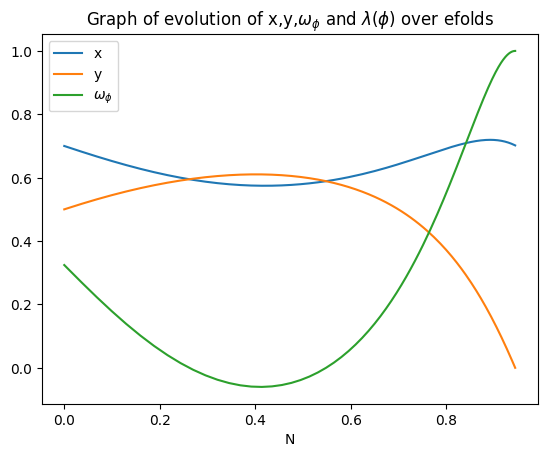

In [4]:
wb = 0

def Gamma(lam):
    return 1.0 - 0.5*((lam + (2/3)**0.5)/lam)**1.0
                                             
def system(N,X):
    x, y, z ,lam = X
    dx = -3*x+ np.sqrt(3/2)*lam*y**2 +1.5*x*(2* x**2+(1+wb)*z**2)  #shows how the kinetic energy density fraction grows over e folds
    dy = -np.sqrt(3/2)*x*y*lam+ 1.5*y*(2*x**2+(1+wb)*z**2)  #shows how the potential energy density fraction grows over e folds
    dz= -3/2 *(1+wb)*z+3/2*z*(2*x**2 +(1+wb)*z**2)
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)  #shows the potnetial gradient change over e folds
    return [dx, dy,dz, dlam]

# Initial conditions
X0 = [0.7, 0.5,0.5, 1]  #[0.7, 0.5,0.5, 0.1]   0.01, 0.9,0.43, 0.01
N_span = np.linspace(0, 100, 1000)# inflation lasted approx 60 efolds
#   early time inflation slow roll [0.01, 0.99, 0.01-1], wb=0, N=0-5
#   early time post inflation radiation dom time [0.05, 0.95, 1-3], wb=1/3, N=0-5
#   late time tracking [0.1, 0.1, 1-5], wb=0, N=0-60 or 100
#   late time tracking and scaling and DE [0.01, 0.01, 0.5] lambda dominated universe, wb = -1, N=0-60 or 100

sol = solve_ivp(system, [0, 100], X0, N_span = np.linspace(0, 100, 1000), rtol=1e-9, atol=1e-12)
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
lam = sol.y[3]
N = sol.t

x = np.clip(x, -1, 1)
y = np.clip(y, 0, 1)
z = np.clip(z, -1, 1)
w_phi = (x**2 - y**2)/(x**2 + y**2 + 1e-18)
w_phi = np.clip(w_phi, -1, 1)

plt.plot(N,x, label='x')
plt.plot(N, y, label='y')
#plt.plot(N_span, lam, label='$\lambda$')
plt.plot(N, w_phi, label='$\omega_\phi$')
plt.title(rf"Graph of evolution of x,y,$\omega_\phi$ and $\lambda(\phi)$ over efolds")
plt.legend()
plt.xlabel("N")
plt.show()


Gradient at points in the phi vs V plot

In [5]:
phi = np.linspace(-1,5,100)
V_0= 1
V=V_0*(1-np.exp(-((2/3)**0.5)*phi))**2 

def get_graph_gradients(phi, V, n=7):
    all_grads = np.gradient(V, phi)
    indices = np.linspace(0, len(phi) - 1, n, dtype=int)
    
    phi_points = phi[indices]
    V_points = V[indices]
    grad_values = all_grads[indices]
    
    return phi_points, V_points, grad_values

phi_pts, V_pts, grads = get_graph_gradients(phi, V)
lam_slices =[]

#print(lam_slices)
for phi, V,m in zip(phi_pts, V_pts,grads):
    print(rf"at ({phi, V}) m={m}")
    print(rf"lambda={-m/V}")
    lam_slices.append(-m/V)
    print()
    #plt.scatter(phi,V)
print(lam_slices)

at ((np.float64(-1.0), np.float64(1.5940558416688972))) m=-4.354405162840924
lambda=2.7316515827212666

at ((np.float64(-0.030303030303030276), np.float64(0.0006275501966698984))) m=-0.04405202756275957
lambda=70.1968189899742

at ((np.float64(1.0), np.float64(0.3113892475111972))) m=0.4025242006863867
lambda=-1.2926721262972076

at ((np.float64(1.9696969696969697), np.float64(0.6396199680930459))) m=0.26153809659521343
lambda=-0.4088960783619053

at ((np.float64(3.0), np.float64(0.8347789269746457))) m=0.1288537898079989
lambda=-0.1543567831485431

at ((np.float64(3.9696969696969697), np.float64(0.9232995885235719))) m=0.06139837570960527
lambda=-0.0664988661023732

at ((np.float64(5.0), np.float64(0.9665533701746055))) m=0.02774586293785294
lambda=-0.02870598126706725

[np.float64(2.7316515827212666), np.float64(70.1968189899742), np.float64(-1.2926721262972076), np.float64(-0.4088960783619053), np.float64(-0.1543567831485431), np.float64(-0.0664988661023732), np.float64(-0.028705981

Dynamical system solver using odeint, assuming $\kappa$ =0 or flat curvature

[np.float64(2.7316515827212666), np.float64(70.1968189899742), np.float64(-1.2926721262972076), np.float64(-0.4088960783619053), np.float64(-0.1543567831485431), np.float64(-0.0664988661023732), np.float64(-0.02870598126706725)]
Plot of phase portrait xy at $\lambda$=2.7317


<>:49: SyntaxWarning: invalid escape sequence '\o'
<>:126: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\o'
<>:126: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2292/2049980646.py:49: SyntaxWarning: invalid escape sequence '\o'
  """
/tmp/ipykernel_2292/2049980646.py:126: SyntaxWarning: invalid escape sequence '\p'
  plt.fill_between(xs, ys, 1.5, alpha=0.3,label="Eternal acceleration condition barrier, $w_\phi < -1/3$")


Physical fixed points: [[-1.0, 0.0], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         6.34557627]
Type=node
Stability=Repeller

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [ 6.         -0.34557627]
Type=node
Stability=saddle



/tmp/ipykernel_2292/2049980646.py:166: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  trajectory= odeint(lambda X,N:dynamicsStateSpace(X[0],X[1],z0,lam_slice)[:2],x_start, np.linspace(0,50,500))


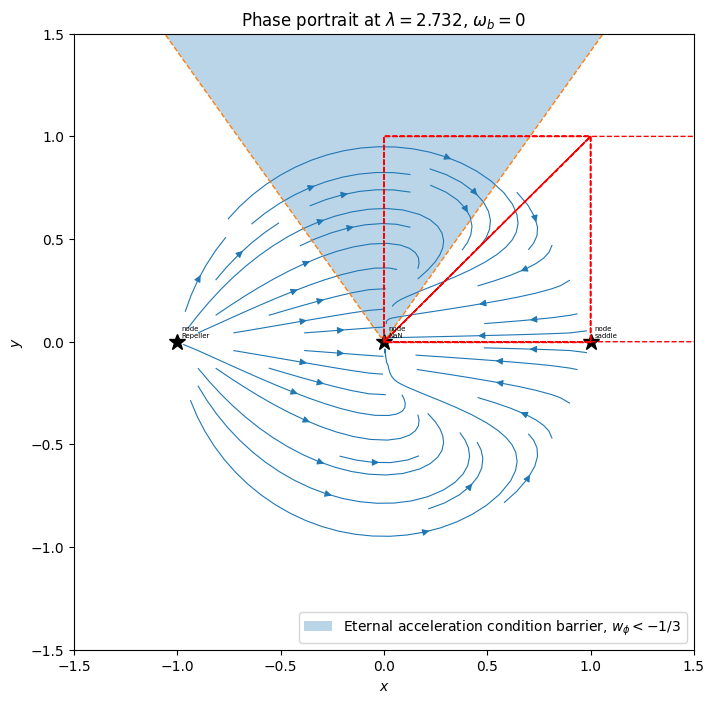

Plot of phase portrait xy at $\lambda$=70.1968
Physical fixed points: [[-1.0, 0.0], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [ 6.         88.97319405]
Type=node
Stability=Repeller

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [  6.         -82.97319405]
Type=node
Stability=saddle



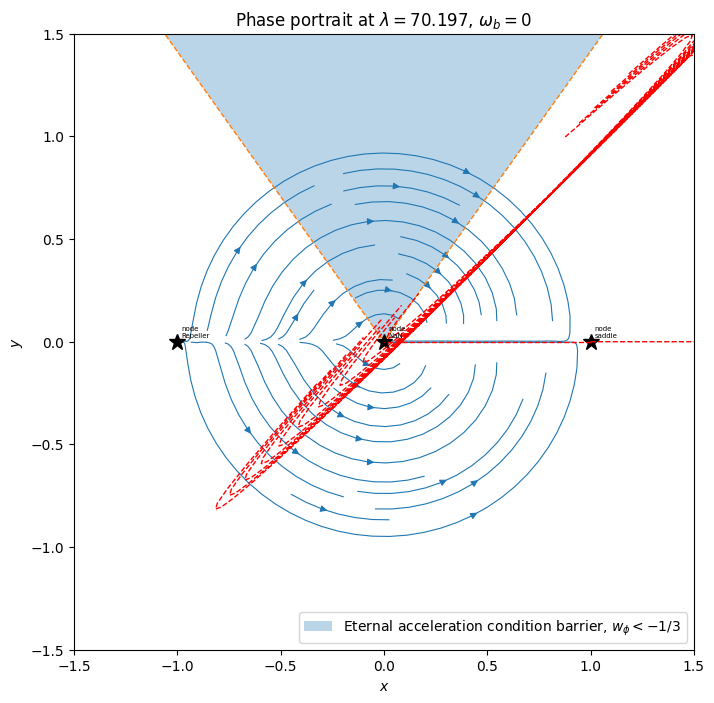

Plot of phase portrait xy at $\lambda$=-1.2927
Physical fixed points: [[-1.0, 0.0], [-0.5277311856911233, -0.8494114407335477], [-0.5277311856911233, 0.8494114407335477], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         1.41680644]
Type=node
Stability=Repeller

Fixed points (-0.5277311856911233,-0.8494114407335477)
Eigen Values: [-2.16449939  1.67100123]
Type=node
Stability=saddle

Fixed points (-0.5277311856911233,0.8494114407335477)
Eigen Values: [-2.16449939  1.67100123]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.         4.58319356]
Type=node
Stability=Repeller



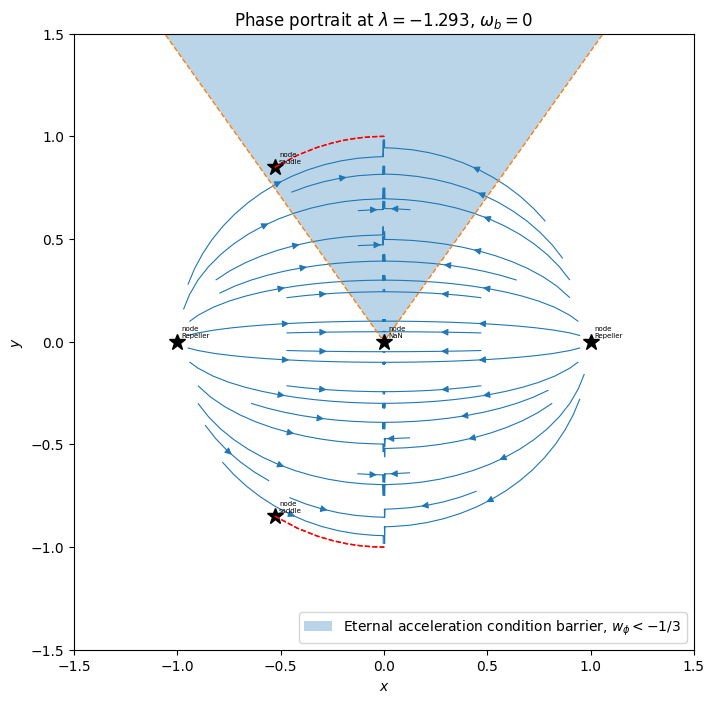

Plot of phase portrait xy at $\lambda$=-0.4089
Physical fixed points: [[-1.0, 0.0], [-0.16693112496862567, -0.9859685590913684], [-0.16693112496862567, 0.9859685590913684], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         2.49920663]
Type=node
Stability=Repeller

Fixed points (-0.16693112496862567,-0.9859685590913684)
Eigen Values: [-2.916402  0.167196]
Type=node
Stability=saddle

Fixed points (-0.16693112496862567,0.9859685590913684)
Eigen Values: [-2.916402  0.167196]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.         3.50079337]
Type=node
Stability=Repeller



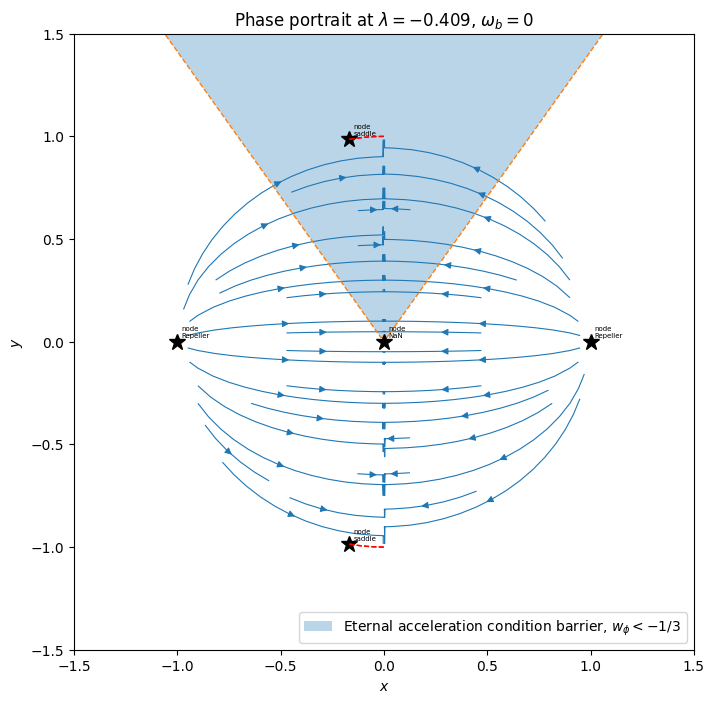

Plot of phase portrait xy at $\lambda$=-0.1544
Physical fixed points: [[-1.0, 0.0], [-0.063015892841894, -0.9980125235934362], [-0.063015892841894, 0.9980125235934362], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         2.81095232]
Type=node
Stability=Repeller

Fixed points (-0.063015892841894,-0.9980125235934362)
Eigen Values: [-2.98808699  0.02382602]
Type=node
Stability=saddle

Fixed points (-0.063015892841894,0.9980125235934362)
Eigen Values: [-2.98808699  0.02382602]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.         3.18904768]
Type=node
Stability=Repeller



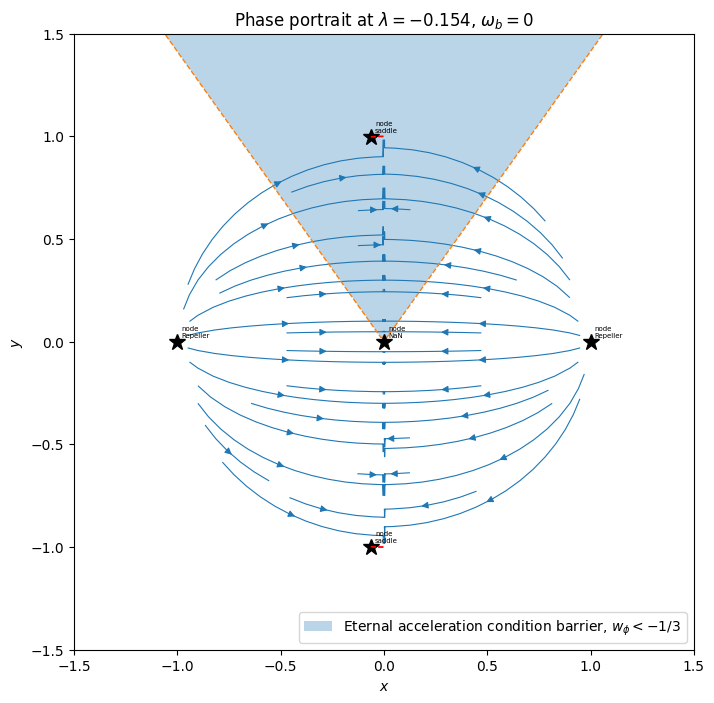

Plot of phase portrait xy at $\lambda$=-0.0665
Physical fixed points: [[-1.0, 0.0], [-0.0271480484040792, -0.9996314238097208], [-0.0271480484040792, 0.9996314238097208], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         2.91855585]
Type=node
Stability=Repeller

Fixed points (-0.0271480484040792,-0.9996314238097208)
Eigen Values: [-2.99778895  0.0044221 ]
Type=node
Stability=saddle

Fixed points (-0.0271480484040792,0.9996314238097208)
Eigen Values: [-2.99778895  0.0044221 ]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.         3.08144415]
Type=node
Stability=Repeller



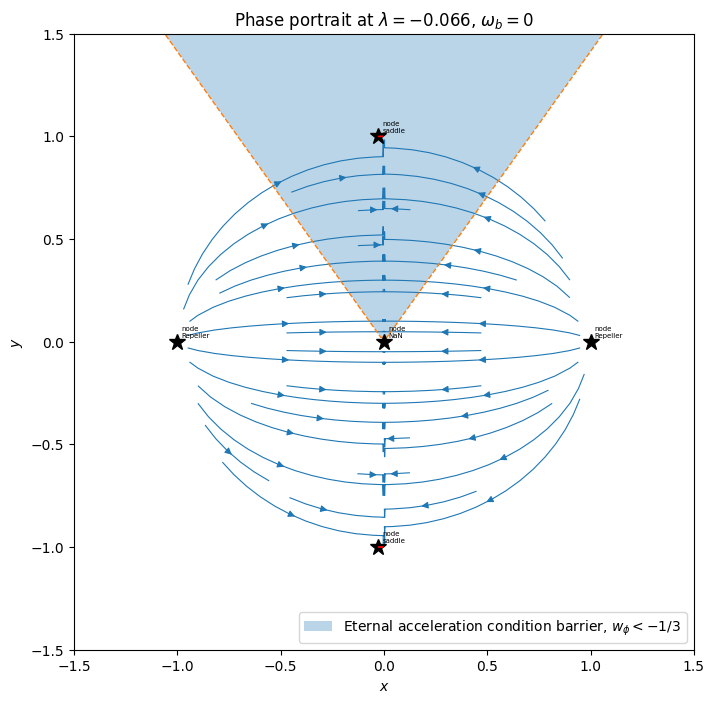

Plot of phase portrait xy at $\lambda$=-0.0287
Physical fixed points: [[-1.0, 0.0], [-0.011719167778367868, -0.9999313281953829], [-0.011719167778367868, 0.9999313281953829], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.        2.9648425]
Type=node
Stability=Repeller

Fixed points (-0.011719167778367868,-0.9999313281953829)
Eigen Values: [-2.99958798e+00  8.24033361e-04]
Type=node
Stability=saddle

Fixed points (-0.011719167778367868,0.9999313281953829)
Eigen Values: [-2.99958798e+00  8.24033361e-04]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.        3.0351575]
Type=node
Stability=Repeller



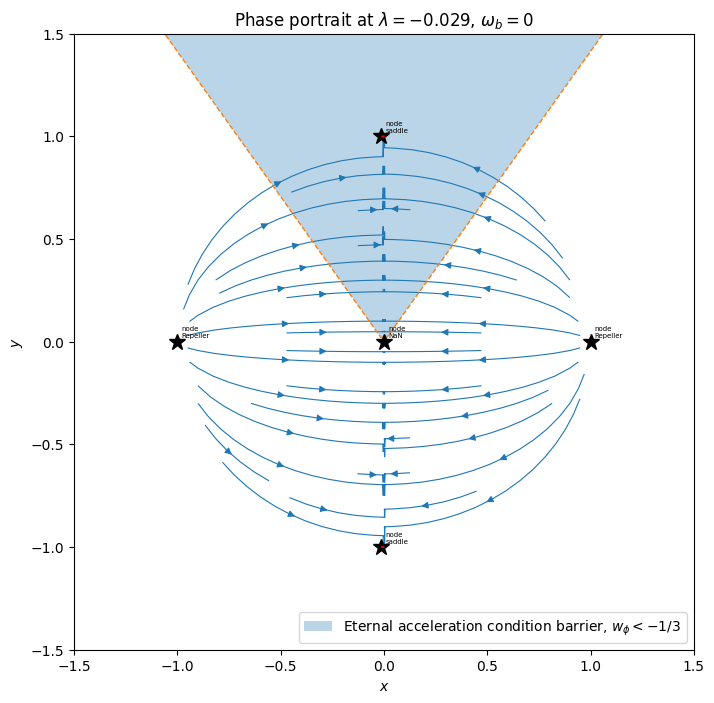

In [6]:
wb = 0 #  to show inflationary era, wb=0 as scalar dominated so wb is irrelevant, for radiation era w=1/3, for matter era with dust w=0 and at late time scalar dominated w=0
z0=0
phi = np.linspace(-1,5,100)
V0=1
V=V_0*(1-np.exp(-((2/3)**0.5)*phi))**2 
def get_graph_gradients(phi, V, n=7):
    all_grads = np.gradient(V, phi)
    indices = np.linspace(0, len(phi) - 1, n, dtype=int)
    
    phi_points = phi[indices]
    V_points = V[indices]
    grad_values = all_grads[indices]
    
    return phi_points, V_points, grad_values

phi_pts, V_pts, grads = get_graph_gradients(phi, V)
lam_slices =[]

for phi, V,m in zip(phi_pts, V_pts,grads):
    lam_val=-m/V
    lam_slices.append(lam_val)
print(lam_slices)


def Gamma(lam):
    lam = max(lam, 1e-6)
    return 1-0.5*((lam+2*np.sqrt(2/3))/lam)  

def dynamicsStateSpace(x,y,z,lam):
    
    lam = max(lam, 1e-6)# avoids runaway lambda when kinetic energy domination goes to -
    dx = -3*x+ np.sqrt(3/2)*lam*y**2 +1.5*x*(2*x**2 +(1+wb)*z**2)  #shows how the kinetic energy density fraction grows over e folds
    dy = -np.sqrt(3/2)*x*y*lam+ 1.5*y*(2*x**2 +(1+wb)*z**2)  #shows how the potential energy density fraction grows over e folds
    dz= -3/2 *(1+wb)*z+3/2*z*(2*x**2 +(1+wb)*z**2)
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)  #shows the potnetial gradient change over e folds
    return [dx, dy,dz, dlam]

def dynamics_odeint(X,N,lam_fixed):
  x,y,z,_ = X
  dx,dy,dz,dlam = dynamicsStateSpace(x,y,z,lam_fixed)
  return [dx,dy,dz,dlam]

# plot the dynamics on the same graph
initialState=np.array([0.7, 0.5,z0, 0.5])# CHANGING THESE YIELDS A DIFFERENT TRAJECTORY. choose suitable starting position

simulationTime=np.linspace(0,50,600)#  number of e folds of time, inflation lasted 50-60
# generate the state-space trajectory

"""
x_vals = solutionState[:,0]
y_vals = solutionState[:,1]
z_vals = solutionState[:,2]
lam_vals = solutionState[:,3]
w_phi = ((solutionState[:,0])**2-(solutionState[:,1])**2)/((solutionState[:,0])**2+(solutionState[:,1])**2)

plt.plot(simulationTime,w_phi)
plt.ylabel(rf'$\omega_\phi$')
plt.xlabel('Simulation time e folds')
plt.show()

plt.plot(simulationTime,lam_vals)
plt.ylabel('lam_vals')
plt.xlabel('Simulation time e folds')
plt.show()
"""
#plotting phase portrait at lambda slice
def phase_plot_at_lam(lam_slice,initialState):
  solutionState=odeint(dynamics_odeint,initialState,simulationTime,args=(lam_slice,),rtol=1e-10,atol=1e-10,mxstep=500)
  #lam_slice = lam_vals[lam_index]
  print(rf"Plot of phase portrait xy at $\lambda$={lam_slice:.4f}")
  x_vals = solutionState[:,0]
  y_vals = solutionState[:,1]

  # defining a grid of points at which we create/compute tangent arrows
  x0 = np.linspace(-1.5,1.5,100)
  x1 = np.linspace(-1.5,1.5,100)
  X0,X1 = np.meshgrid(x0,x1)
  dX0 = np.zeros(X0.shape)
  dX1 = np.zeros(X1.shape)

  for i in range(X0.shape[0]):
      for j in range(X0.shape[1]):
          if X0[i,j]**2 + X1[i,j]**2 <= 1.0:
              dx,dy,_,_= dynamicsStateSpace(X0[i,j], X1[i,j],z0, lam_slice)
              dX0[i,j] = dx
              dX1[i,j] = dy
          else:
              dX0[i,j] = np.nan
              dX1[i,j] = np.nan

  x_FP, y_FP,z_FP,lam_FP = sp.symbols('x y z lam', real=True)

  Gamma_sym = 1 - 0.5*((lam_FP + 2*sp.sqrt(2/3))/lam_FP)
  f = -3*x_FP+ np.sqrt(3/2)*lam_FP*y_FP**2 +1.5*x_FP*(2* x_FP**2+(1+wb)*z_FP**2)  #shows how the kinetic energy density fraction grows over e folds
  g = -np.sqrt(3/2)*x_FP*y_FP*lam_FP+ 1.5*y_FP*(2*x_FP**2+(1+wb)*z_FP**2)  #shows how the potential energy density fraction grows over e folds
  #h= -3/2 *(1+wb)*z_FP+3/2*z_FP*(2*x_FP**2 +(1+wb)*z_FP**2)
  #e = -np.sqrt(6)*x_FP*lam_FP**2*(Gamma_sym-1)
  J_sym = sp.Matrix([f, g]).jacobian([x_FP, y_FP]) # Symbolic Jacobian for x and y 2D

  f_lam = f.subs({lam_FP: lam_slice, z_FP: z0})
  g_lam = g.subs({lam_FP: lam_slice, z_FP: z0})
  
  solutions = sp.solve([f_lam, g_lam], [x_FP, y_FP], dict=True)
  FP=[]
  for sol in solutions:
    if x_FP in sol and y_FP in sol:
      x_val = sol[x_FP]
      y_val = sol[y_FP]
      #z_val = sol[z_FP]
      #lam_val = sol[lam_FP]
      if x_val.is_real and y_val.is_real:
          x_val,y_val = float(x_val),float(y_val)
          if x_val**2 +y_val**2<=1.5:
            FP.append([float(x_val),float(y_val)])
  print("Physical fixed points:", FP)

  plt.figure(figsize=(8,8))
  plt.streamplot(X0, X1, dX0, dX1, density=1.2, linewidth=0.8)
  #plt.plot(x_vals, y_vals, 'r', lw=2, label='Trajectory')
  #plt.plot(x_vals[0], y_vals[0], 'ro', label='Initial condition')

# eternal acc is w_phi<-1/3 leads to y=+-root(2) x
  xs = np.linspace(-1.5, 1.5,100)
  ys = np.sqrt(2)*np.abs(xs)
  plt.plot(xs,ys,'--',lw=1)
  plt.fill_between(xs, ys, 1.5, alpha=0.3,label="Eternal acceleration condition barrier, $w_\phi < -1/3$")


  def classify_FP(eigvals,temp=1e-10):
    Real = np.real(eigvals)
    Imag = np.imag(eigvals)
    if np.all(Real<-temp):
      stability = 'Attractor'
    elif np.all(Real>temp):
      stability = 'Repeller'
    elif np.any(Real<-temp) and np.any(Real > temp):
      stability = 'saddle'
    elif np.all(np.abs(Real) < temp):
      stability = 'Centre'
    else:
      stability = 'NaN'
    if np.any(np.abs(Imag)>temp):
      point_type = 'Spiral'
    else:
      point_type = 'node'

    return stability,point_type

  for fp in FP:
    x_c, y_c = fp
    J_num = np.array(J_sym.subs({x_FP: x_c,y_FP: y_c,lam_FP: lam_slice,z_FP: z0}),dtype=float)
    eigvals,eigvecs = np.linalg.eig(J_num)
    stability,point_type = classify_FP(eigvals)
    print(f'Fixed points ({x_c:},{y_c})')
    print('Eigen Values:',eigvals)
    print(f'Type={point_type}')
    print(f'Stability={stability}\n')
    plt.plot(x_c, y_c, 'k*', markersize=12)
    plt.text(x_c+0.02, y_c+0.02, f"{point_type}\n{stability}", fontsize=5)
    if stability=='saddle':
       delta=1e-5 # small perturbations along eigenvector
       for vector,value in zip(eigvecs.T,eigvals):
          if value>0:
             for pm in [-1,1]: #either positive of negative direction
              x_start = np.array([x_c,y_c])+pm*delta*vector[:2]
              trajectory= odeint(lambda X,N:dynamicsStateSpace(X[0],X[1],z0,lam_slice)[:2],x_start, np.linspace(0,50,500))
              plt.plot(trajectory[:,0],trajectory[:,1],'r--',linewidth=1)
    

  plt.xlabel(r"$x$")
  plt.ylabel(r"$y$")
  plt.title(rf"Phase portrait at $\lambda={lam_slice:.3f}$, $\omega_b={wb}$")
  plt.xlim(-1.5,1.5)
  plt.ylim(-1.5,1.5)
  plt.legend()
  plt.show()





slice_no = 6
for lam_slice in lam_slices:
    phase_plot_at_lam(lam_slice, initialState)

# https://aleksandarhaber.com/phase-portraits-of-state-space-models-and-differential-equations-in-python/, https://www.youtube.com/watch?v=DeeoiE22bZ8, method from https://iopscience.iop.org/article/10.1088/1475-7516/2018/01/018/meta


2D phase plot of ODE system x-y, with fixed lambda intervals and zero barotropic density or curvature \
-below phase plots uses a tighter system with limits on the separatrices so they only plot ON the phase space, whereas above evolves in 4D and plots between layers. 

<>:93: SyntaxWarning: invalid escape sequence '\p'
<>:93: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2292/2137852643.py:93: SyntaxWarning: invalid escape sequence '\p'
  plt.fill_between(xs, ys, 1.5, alpha=0.3,label="Eternal acceleration condition barrier, $w_\phi < -1/3$")


[np.float64(2.7316515827212666), np.float64(70.1968189899742), np.float64(-1.2926721262972076), np.float64(-0.4088960783619053), np.float64(-0.1543567831485431), np.float64(-0.0664988661023732), np.float64(-0.02870598126706725)]
Plot of phase portrait xy at $\lambda$=2.7317
Physical fixed points: [[-1.0, 0.0], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         6.34557627]
Type=node
Stability=Repeller

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [ 6.         -0.34557627]
Type=node
Stability=saddle



/tmp/ipykernel_2292/2137852643.py:134: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  trajectory= odeint(lambda X,N:dynamicsStateSpace_lamfixed(X[0],X[1],lam_slice),x_start, simulationTime)


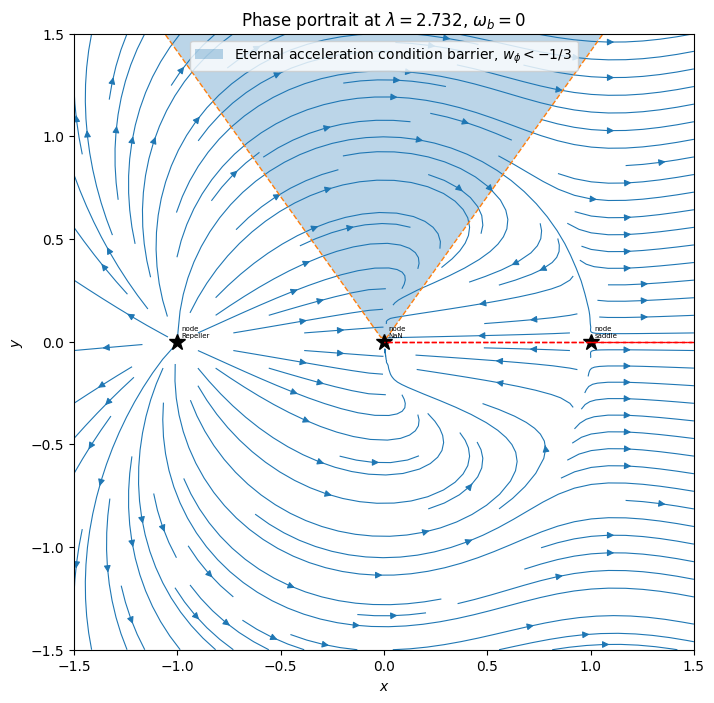

Plot of phase portrait xy at $\lambda$=70.1968
Physical fixed points: [[-1.0, 0.0], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [ 6.         88.97319405]
Type=node
Stability=Repeller

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [  6.         -82.97319405]
Type=node
Stability=saddle



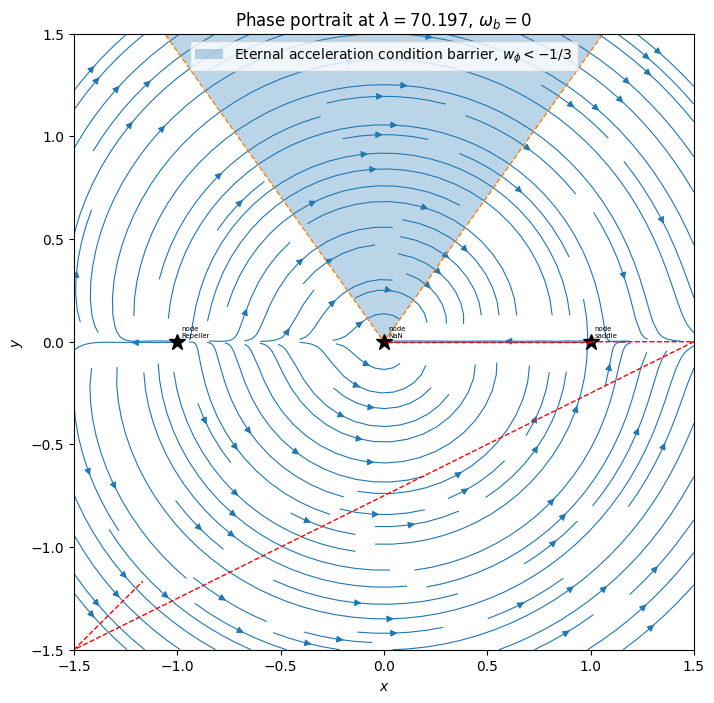

Plot of phase portrait xy at $\lambda$=-1.2927
Physical fixed points: [[-1.0, 0.0], [-0.5277311856911233, -0.8494114407335477], [-0.5277311856911233, 0.8494114407335477], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         1.41680644]
Type=node
Stability=Repeller

Fixed points (-0.5277311856911233,-0.8494114407335477)
Eigen Values: [-2.16449939  1.67100123]
Type=node
Stability=saddle

Fixed points (-0.5277311856911233,0.8494114407335477)
Eigen Values: [-2.16449939  1.67100123]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.         4.58319356]
Type=node
Stability=Repeller



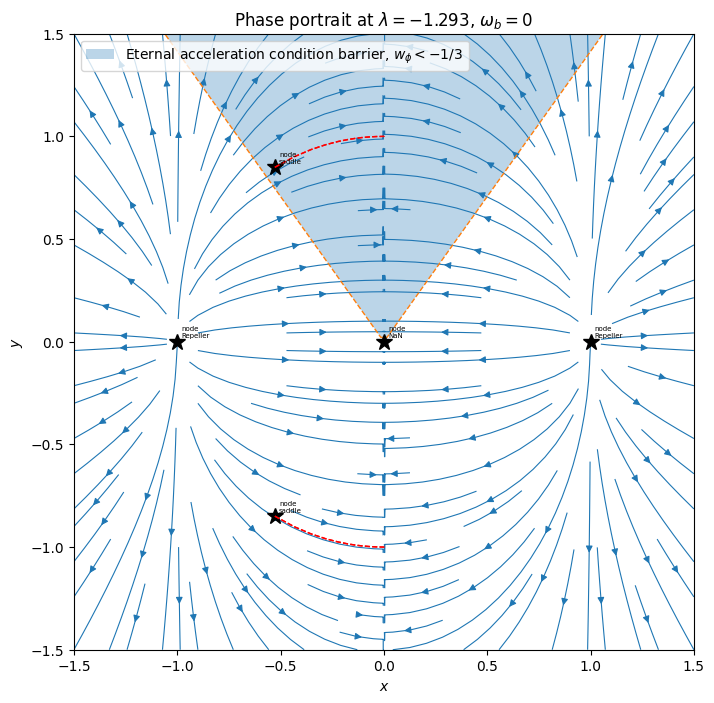

Plot of phase portrait xy at $\lambda$=-0.4089
Physical fixed points: [[-1.0, 0.0], [-0.16693112496862567, -0.9859685590913684], [-0.16693112496862567, 0.9859685590913684], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         2.49920663]
Type=node
Stability=Repeller

Fixed points (-0.16693112496862567,-0.9859685590913684)
Eigen Values: [-2.916402  0.167196]
Type=node
Stability=saddle

Fixed points (-0.16693112496862567,0.9859685590913684)
Eigen Values: [-2.916402  0.167196]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.         3.50079337]
Type=node
Stability=Repeller



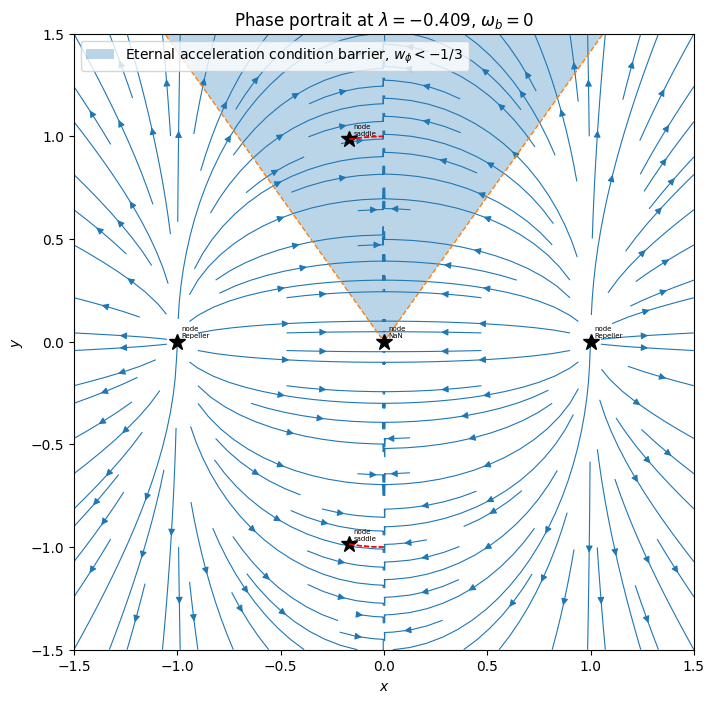

Plot of phase portrait xy at $\lambda$=-0.1544
Physical fixed points: [[-1.0, 0.0], [-0.063015892841894, -0.9980125235934362], [-0.063015892841894, 0.9980125235934362], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         2.81095232]
Type=node
Stability=Repeller

Fixed points (-0.063015892841894,-0.9980125235934362)
Eigen Values: [-2.98808699  0.02382602]
Type=node
Stability=saddle

Fixed points (-0.063015892841894,0.9980125235934362)
Eigen Values: [-2.98808699  0.02382602]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.         3.18904768]
Type=node
Stability=Repeller



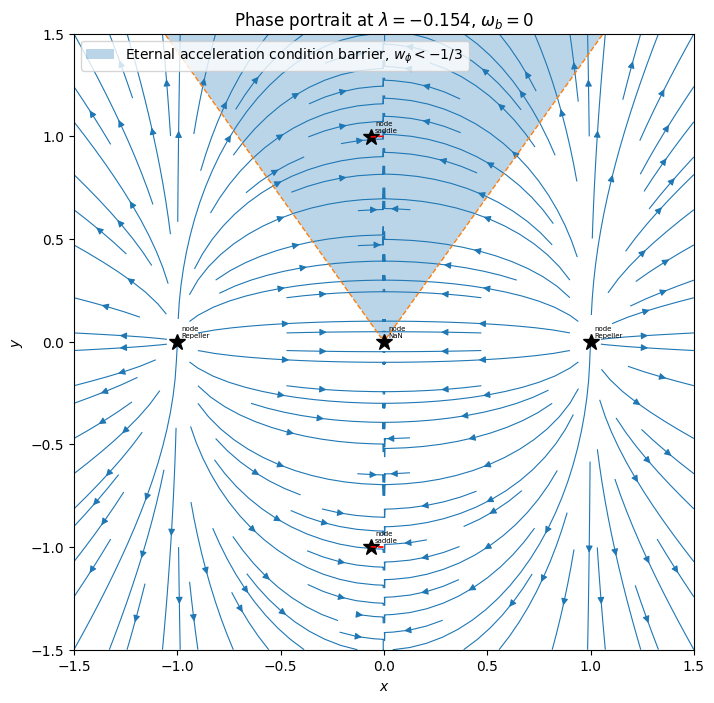

Plot of phase portrait xy at $\lambda$=-0.0665
Physical fixed points: [[-1.0, 0.0], [-0.0271480484040792, -0.9996314238097208], [-0.0271480484040792, 0.9996314238097208], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         2.91855585]
Type=node
Stability=Repeller

Fixed points (-0.0271480484040792,-0.9996314238097208)
Eigen Values: [-2.99778895  0.0044221 ]
Type=node
Stability=saddle

Fixed points (-0.0271480484040792,0.9996314238097208)
Eigen Values: [-2.99778895  0.0044221 ]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.         3.08144415]
Type=node
Stability=Repeller



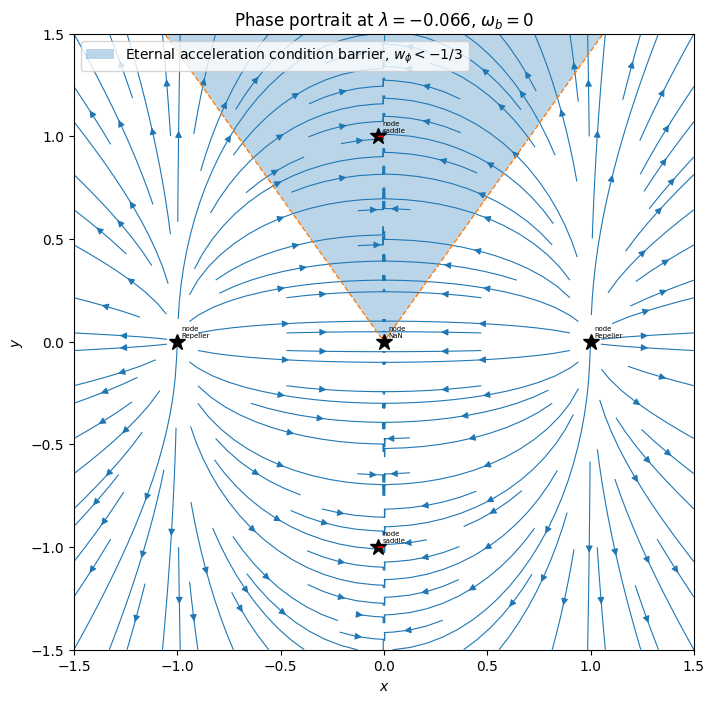

Plot of phase portrait xy at $\lambda$=-0.0287
Physical fixed points: [[-1.0, 0.0], [-0.011719167778367868, -0.9999313281953829], [-0.011719167778367868, 0.9999313281953829], [0.0, 0.0], [1.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.        2.9648425]
Type=node
Stability=Repeller

Fixed points (-0.011719167778367868,-0.9999313281953829)
Eigen Values: [-2.99958798e+00  8.24033361e-04]
Type=node
Stability=saddle

Fixed points (-0.011719167778367868,0.9999313281953829)
Eigen Values: [-2.99958798e+00  8.24033361e-04]
Type=node
Stability=saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.  0.]
Type=node
Stability=NaN

Fixed points (1.0,0.0)
Eigen Values: [6.        3.0351575]
Type=node
Stability=Repeller



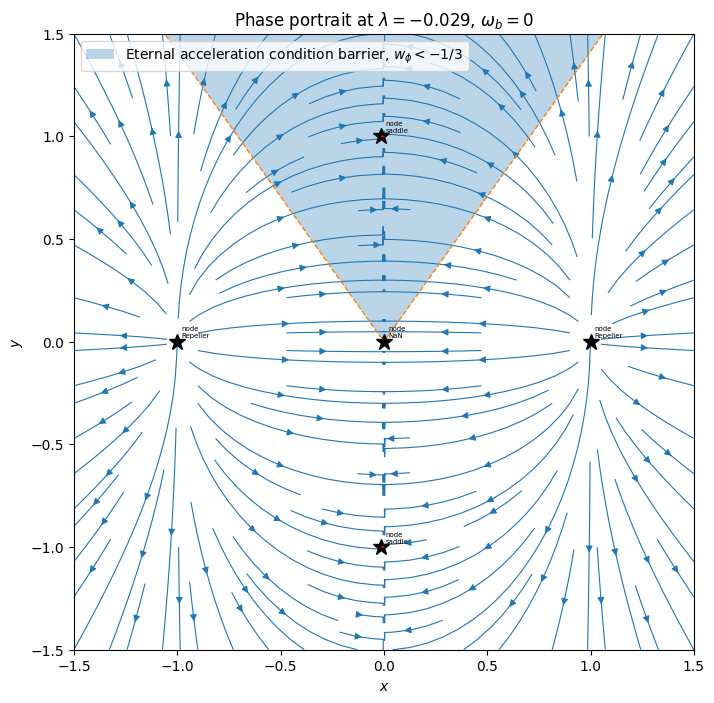

In [7]:
wb = 0 #  to show inflationary era, wb=0 as scalar dominated so wb is irrelevant, for radiation era w=1/3, for matter era with dust w=0 and at late time scalar dominated w=0
z0=0
phi = np.linspace(-1,5,100)
V0=1
V=V_0*(1-np.exp(-((2/3)**0.5)*phi))**2 
def get_graph_gradients(phi, V, n=7):
    all_grads = np.gradient(V, phi)
    indices = np.linspace(0, len(phi) - 1, n, dtype=int)
    
    phi_points = phi[indices]
    V_points = V[indices]
    grad_values = all_grads[indices]
    
    return phi_points, V_points, grad_values

phi_pts, V_pts, grads = get_graph_gradients(phi, V)
lam_slices =[]

for phi, V,m in zip(phi_pts, V_pts,grads):
    lam_val=-m/V
    lam_slices.append(lam_val)
print(lam_slices)
 

def dynamicsStateSpace_lamfixed(x,y,lam):
    lam = max(lam, 1e-6)# avoids runaway lambda when kinetic energy domination goes to -
    dx = -3*x+ np.sqrt(3/2)*lam*y**2 +1.5*x*(2*x**2 +(1+wb)*z0**2)  #shows how the kinetic energy density fraction grows over e folds
    dy = -np.sqrt(3/2)*x*y*lam+ 1.5*y*(2*x**2 +(1+wb)*z0**2)  #shows how the potential energy density fraction grows over e folds
    return dx, dy



# plot the dynamics on the same graph
initialState=np.array([0.9, 0.1])# CHANGING THESE YIELDS A DIFFERENT TRAJECTORY. choose suitable starting position

simulationTime=np.linspace(0,50,600)#  number of e folds of time, inflation lasted 50-60
# generate the state-space trajectory

#plotting phase portrait at lambda slice
def phase_plot_at_lam(lam_slice,initialState):
  solutionState=odeint(lambda X,N: dynamicsStateSpace_lamfixed(X[0],X[1],lam_slice),initialState,simulationTime,rtol=1e-10,atol=1e-10,mxstep=500)
  print(rf"Plot of phase portrait xy at $\lambda$={lam_slice:.4f}")
  x_vals = solutionState[:,0]
  y_vals = solutionState[:,1]

  # defining a grid of points at which we create/compute tangent arrows
  x0 = np.linspace(-1.5,1.5,100)
  x1 = np.linspace(-1.5,1.5,100)
  X0,X1 = np.meshgrid(x0,x1)
  dX0 = np.zeros(X0.shape)
  dX1 = np.zeros(X1.shape)

  for i in range(X0.shape[0]):
      for j in range(X0.shape[1]):
          #if X0[i,j]**2 + X1[i,j]**2 <= 1.0:
              dx,dy= dynamicsStateSpace_lamfixed(X0[i,j], X1[i,j], lam_slice)
              dX0[i,j] = dx
              dX1[i,j] = dy
          #else:
           #   dX0[i,j] = np.nan
           #   dX1[i,j] = np.nan

  x_FP, y_FP = sp.symbols('x y ', real=True)

  f = -3*x_FP+ np.sqrt(3/2)*lam_slice*y_FP**2 +1.5*x_FP*(2* x_FP**2+(1+wb)*z0**2)  #shows how the kinetic energy density fraction grows over e folds
  g = -np.sqrt(3/2)*x_FP*y_FP*lam_slice+ 1.5*y_FP*(2*x_FP**2+(1+wb)*z0**2)  #shows how the potential energy density fraction grows over e folds
  
  J_sym = sp.Matrix([f, g]).jacobian([x_FP, y_FP]) # Symbolic Jacobian for x and y 2D

  solutions = sp.solve([f, g], [x_FP, y_FP], dict=True)
  FP=[]
  for sol in solutions:
    if x_FP in sol and y_FP in sol:
      x_val = sol[x_FP]
      y_val = sol[y_FP]
      #z_val = sol[z_FP]
      #lam_val = sol[lam_FP]
      if x_val.is_real and y_val.is_real:
          x_val,y_val = float(x_val),float(y_val)
          if x_val**2 +y_val**2<=1.5:
            FP.append([float(x_val),float(y_val)])
  print("Physical fixed points:", FP)

  plt.figure(figsize=(8,8))
  plt.streamplot(X0, X1, dX0, dX1, density=1.2, linewidth=0.8)
  #plt.plot(x_vals, y_vals, 'r', lw=2, label='Trajectory')
  #plt.plot(x_vals[0], y_vals[0], 'ro', label='Initial condition')

# eternal acc is w_phi<-1/3 leads to y=+-root(2) x
  xs = np.linspace(-1.5, 1.5,100)
  ys = np.sqrt(2)*np.abs(xs)
  plt.plot(xs,ys,'--',lw=1)
  plt.fill_between(xs, ys, 1.5, alpha=0.3,label="Eternal acceleration condition barrier, $w_\phi < -1/3$")
  


  def classify_FP(eigvals,temp=1e-10):
    Real = np.real(eigvals)
    Imag = np.imag(eigvals)
    if np.all(Real<-temp):
      stability = 'Attractor'
    elif np.all(Real>temp):
      stability = 'Repeller'
    elif np.any(Real<-temp) and np.any(Real > temp):
      stability = 'saddle'
    elif np.all(np.abs(Real) < temp):
      stability = 'Centre'
    else:
      stability = 'NaN'
    if np.any(np.abs(Imag)>temp):
      point_type = 'Spiral'
    else:
      point_type = 'node'

    return stability,point_type

  for fp in FP:
    x_c, y_c = fp
    J_num = np.array(J_sym.subs({x_FP: x_c,y_FP: y_c}),dtype=float)
    eigvals,eigvecs = np.linalg.eig(J_num)
    stability,point_type = classify_FP(eigvals)
    print(f'Fixed points ({x_c:},{y_c})')
    print('Eigen Values:',eigvals)
    print(f'Type={point_type}')
    print(f'Stability={stability}\n')
    plt.plot(x_c, y_c, 'k*', markersize=12)
    plt.text(x_c+0.02, y_c+0.02, f"{point_type}\n{stability}", fontsize=5)
    if stability=='saddle':
       delta=1e-5 # small perturbations along eigenvector
       for vector,value in zip(eigvecs.T,eigvals):
          if value>0:
             for pm in [-1,1]: #either positive of negative direction
              x_start = np.array([x_c,y_c])+pm*delta*vector[:2]
              trajectory= odeint(lambda X,N:dynamicsStateSpace_lamfixed(X[0],X[1],lam_slice),x_start, simulationTime)
              x_traj = np.clip(trajectory[:, 0], -1.5, 1.5)
              y_traj = np.clip(trajectory[:, 1], -1.5, 1.5)
              plt.plot(x_traj,y_traj,'r--',linewidth=1)
    

  plt.xlabel(r"$x$")
  plt.ylabel(r"$y$")
  plt.title(rf"Phase portrait at $\lambda={lam_slice:.3f}$, $\omega_b={wb}$")
  plt.xlim(-1.5,1.5)
  plt.ylim(-1.5,1.5)
  plt.legend()
  plt.show()





slice_no = 6
for lam_slice in lam_slices:
    phase_plot_at_lam(lam_slice, initialState)

# https://aleksandarhaber.com/phase-portraits-of-state-space-models-and-differential-equations-in-python/, https://www.youtube.com/watch?v=DeeoiE22bZ8, method from https://iopscience.iop.org/article/10.1088/1475-7516/2018/01/018/meta


Regardless of IC, many of the plots look identical to those at the same lambda value. This is because the Starobinsky potential model is an attractor model, ie it tracks to a set evolution solution in phase space and forgets the ICs rather quickly as is shown by this being plotted over 50 epochs/ roughly the length of inflation. 

lam slices [np.float64(2.7316515827212666), np.float64(70.1968189899742), np.float64(-1.2926721262972076), np.float64(-0.4088960783619053), np.float64(-0.1543567831485431), np.float64(-0.0664988661023732), np.float64(-0.02870598126706725)]
Plot of phase portrait xy at $\lambda$=2.7317


/tmp/ipykernel_2292/4115068309.py:55: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solutionState=odeint(dynamics_odeint,initialState,simulationTime,args=(lam_slice,),rtol=1e-5,atol=1e-5,mxstep=100)# 500


Physical fixed points: [[-1.0, 0.0, 0.0], [0.0, 0.0, -1.0], [0.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.4483532523468823, -0.4483532523468823, -0.7732779074950646], [0.4483532523468823, -0.4483532523468823, 0.7732779074950646], [0.4483532523468823, 0.4483532523468823, -0.7732779074950646], [0.4483532523468823, 0.4483532523468823, 0.7732779074950646], [1.0, 0.0, 0.0]]
Fixed points (-1.0,0.0)
Eigen Values: [6.         6.34557627 1.5       ]
Type=Centre / Degenerate Node
Stability=Repeller

Fixed points (0.0,0.0)
Eigen Values: [-1.5  1.5  3. ]
Type=Saddle Node
Stability=Saddle

Fixed points (0.0,0.0)
Eigen Values: [-3.   0.  -1.5]
Type=Centre / Degenerate Node
Stability=non-hyperbolic (stable direction)

Fixed points (0.0,0.0)
Eigen Values: [-1.5  1.5  3. ]
Type=Saddle Node
Stability=Saddle

Fixed points (0.4483532523468823,-0.4483532523468823)
Eigen Values: [ 3.  +0.j         -0.75+1.45887431j -0.75-1.45887431j]
Type=Spiral Saddle
Stability=Saddle

Fixed points (0.4483532523468823,-0.4483532523

/tmp/ipykernel_2292/4115068309.py:202: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  trajectory = odeint(lambda X,N: dynamicsStateSpace(X[0],X[1],X[2],lam_slice),x_start,short_time,rtol=1e-10,atol=1e-10,mxstep=500)


Fixed points (1.0,0.0)
Eigen Values: [ 6.         -0.34557627  1.5       ]
Type=Saddle Node
Stability=Saddle



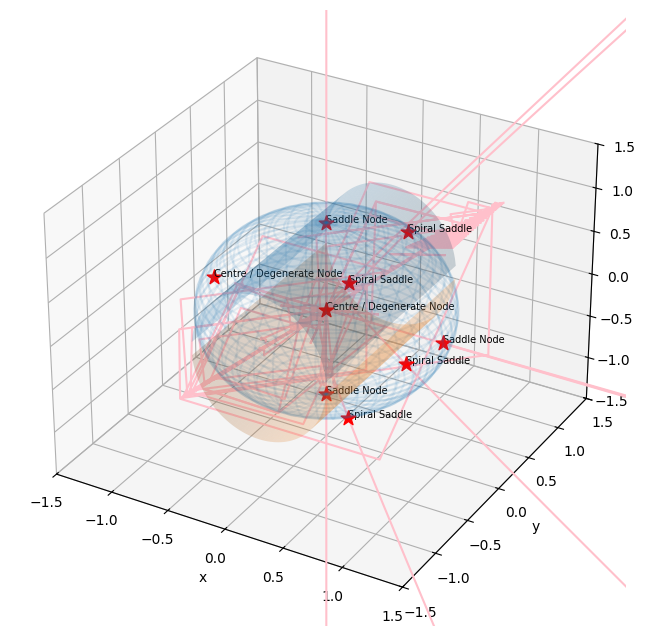

In [37]:
wb = 0 #  to show inflationary era, wb=0 as scalar dominated so wb is irrelevant, for radiation era w=1/3, for matter era with dust w=0 and at late time scalar dominated w=0
x0=0.7
y0=0.5
z0=np.sqrt(1-x0**2-y0**2)
lam0=0.5

phi = np.linspace(-1,5,100)
V0=1
V=V_0*(1-np.exp(-((2/3)**0.5)*phi))**2 

def get_graph_gradients(phi, V, n=7):
    all_grads = np.gradient(V, phi)
    indices = np.linspace(0, len(phi) - 1, n, dtype=int)
    
    phi_points = phi[indices]
    V_points = V[indices]
    grad_values = all_grads[indices]
    
    return phi_points, V_points, grad_values

phi_pts, V_pts, grads = get_graph_gradients(phi, V)
lam_slices =[]

for phi, V,m in zip(phi_pts, V_pts,grads):
    lam_val=-m/V
    lam_slices.append(lam_val)
print("lam slices", lam_slices)


def Gamma(lam):
    lam = max(lam, 1e-6)
    return 1-0.5*((lam+2*np.sqrt(2/3))/lam)  

def dynamicsStateSpace(x,y,z,lam):
    
    lam = max(lam, 1e-6)# avoids runaway lambda when kinetic energy domination goes to -
    dx = -3*x+ np.sqrt(3/2)*lam*y**2 +1.5*x*(2*x**2 +(1+wb)*z**2)  #shows how the kinetic energy density fraction grows over e folds
    dy = -np.sqrt(3/2)*x*y*lam+ 1.5*y*(2*x**2 +(1+wb)*z**2)  #shows how the potential energy density fraction grows over e folds
    dz= -3/2 *(1+wb)*z+3/2*z*(2*x**2 +(1+wb)*z**2)
    #dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)  #shows the potnetial gradient change over e folds
    return [dx, dy,dz]

def dynamics_odeint(X,N,lam_fixed):
  x,y,z = X
  dx,dy,dz= dynamicsStateSpace(x,y,z,lam_fixed)
  return [dx,dy,dz]

# plot the dynamics on the same graph
initialState=np.array([x0,y0,z0])# CHANGING THESE YIELDS A DIFFERENT TRAJECTORY. choose suitable starting position

simulationTime=np.linspace(0,50,600)#  number of e folds of time, inflation lasted 50-60

#plotting phase portrait at lambda slice
def phase_plot_3D_lam(lam_slice,initialState):
  solutionState=odeint(dynamics_odeint,initialState,simulationTime,args=(lam_slice,),rtol=1e-5,atol=1e-5,mxstep=100)# 500
  #lam_slice = lam_vals[lam_index]
  print(rf"Plot of phase portrait xy at $\lambda$={lam_slice:.4f}")
  x_vals = solutionState[:,0]
  y_vals = solutionState[:,1]
  z_vals = solutionState[:,2]

  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111, projection='3d')
  #ax.plot(x_vals, y_vals, z_vals, lw=2)

  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_zlabel("z")

# Friedmann constraint sphere x^2+y^2+z^2=1
  u = np.linspace(0, np.pi, 40)
  v = np.linspace(0, 2*np.pi, 40)
  xs = np.outer(np.sin(u), np.cos(v))
  ys = np.outer(np.sin(u), np.sin(v))
  zs = np.outer(np.cos(u), np.ones_like(v))

  ax.plot_wireframe(xs, ys, zs, alpha=0.1)

  ax.set_xlim([-1.5,1.5])
  ax.set_ylim([-1.5,1.5])
  ax.set_zlim([-1.5,1.5])
  



  x_FP, y_FP,z_FP = sp.symbols('x y z', real=True)

  #Gamma_sym = 1 - 0.5*((lam_FP + 2*sp.sqrt(2/3))/lam_slice)
  f = -3*x_FP+ np.sqrt(3/2)*lam_slice*y_FP**2 +1.5*x_FP*(2* x_FP**2+(1+wb)*z_FP**2)  #shows how the kinetic energy density fraction grows over e folds
  g = -np.sqrt(3/2)*x_FP*y_FP*lam_slice+ 1.5*y_FP*(2*x_FP**2+(1+wb)*z_FP**2)  #shows how the potential energy density fraction grows over e folds
  h= -3/2 *(1+wb)*z_FP+3/2*z_FP*(2*x_FP**2 +(1+wb)*z_FP**2)
  #e = -np.sqrt(6)*x_FP*lam_FP**2*(Gamma_sym-1)
  J_sym = sp.Matrix([f, g,h]).jacobian([x_FP, y_FP,z_FP]) # Symbolic Jacobian for x and y 2D

  #f_lam = f.subs({ z_FP: z0}) #lam_slice: lam_slice,
  #g_lam = g.subs({ z_FP: z0}) #lam_slice: lam_slice,
  
  solutions = sp.solve([f, g,h], [x_FP, y_FP,z_FP], dict=True)
  FP=[]
  for sol in solutions:
    if x_FP in sol and y_FP in sol:
      x_val = sol[x_FP]
      y_val = sol[y_FP]
      z_val = sol[z_FP]
      #lam_val = sol[lam_FP]
      if x_val.is_real and y_val.is_real and z_val.is_real:
          x_val,y_val,z_val = float(x_val),float(y_val),float(z_val)
          if x_val**2 +y_val**2 +z_val**2 <=1.0+1e-6:
            FP.append([float(x_val),float(y_val),float(z_val)])
  print("Physical fixed points:", FP)

  #plt.figure(figsize=(8,8))
  #plt.streamplot(X0, X1, dX0, dX1, density=1.2, linewidth=0.8)
  #plt.plot(x_vals, y_vals, 'r', lw=2, label='Trajectory')
  #plt.plot(x_vals[0], y_vals[0], 'ro', label='Initial condition')

# eternal acc is w_phi<-1/3 leads to y=+-root(2) x
# acceleration surface
  x = np.linspace(-0.8,0.8,200)
  y = np.linspace(-1,1,50)

  X, Y = np.meshgrid(x, y)

  expr = 2/3 - 2*X**2

  Z = np.full_like(expr, np.nan)

  valid = expr >= 0

  Z[valid] = np.sqrt(expr[valid] / (1+wb))

  ax.plot_surface(X, Y, Z, alpha=0.2)
  ax.plot_surface(X, Y, -Z, alpha=0.2)



  def classify_FP(eigvals,temp=1e-10):
    eigvals = np.array(eigvals, dtype=complex)
    Real = np.real(eigvals)
    Imag = np.imag(eigvals)

    n_minus =np.sum(Real<-temp)
    n_pos = np.sum(Real>temp)
    n_zero = 3-n_minus-n_pos
    has_imag = np.any(np.abs(Imag)>temp)


    if n_minus ==3:
      stability = 'Attractor'
    elif n_pos ==3:
      stability = 'Repeller'
    elif n_minus>0 and n_pos>0:
      stability = 'Saddle'
    elif n_zero >0 and n_pos ==0:
      stability = 'non-hyperbolic (stable direction)'
    elif n_zero >0 and n_minus ==0:
      stability = 'non-hyperbolic (unstable direction)'
    else:
      stability = 'intermediate'

    if has_imag:
       if stability =='Attractor':
          point_type ='Stable Spiral Attractor'
       elif stability =='Repeller':
          point_type ='Unstable Spiral Repeller'
       elif stability =='Saddle':
          point_type ='Spiral Saddle'
       else: 
          point_type = 'Degenerate Spiral Focus/centre'
    else:
       if stability =='Attractor':
          point_type ='Stable Node'
       if stability =='Repeller':
          point_type ='Unstable Node'
       if stability =='Saddle':
          point_type ='Saddle Node'
       else:
            point_type = "Centre / Degenerate Node"
    return stability,point_type

  for fp in FP:
    x_c, y_c,z_c = fp
    J_num = np.array(J_sym.subs({x_FP: x_c,y_FP: y_c,z_FP: z_c}),dtype=float)
    eigvals,eigvecs = np.linalg.eig(J_num)
    stability,point_type = classify_FP(eigvals)
    print(f'Fixed points ({x_c:},{y_c})')
    print('Eigen Values:',eigvals)
    print(f'Type={point_type}')
    print(f'Stability={stability}\n')
    ax.scatter(x_c,y_c,z_c,color='red', marker='*', s=120)
    ax.text(x_c, y_c, z_c, f"{point_type}",fontsize=7)
    #plt.plot(x_c, y_c, 'k*', markersize=12)
    #plt.text(x_c+0.02, y_c+0.02, f"{point_type}\n{stability}", fontsize=5)
    if stability=='Saddle':
       delta=1e-5 # small perturbations along eigenvector
       for vector,value in zip(eigvecs.T,eigvals):
          if np.real(value)>0: #only plots the unstable directions
             short_time = np.linspace(0, 5, 200)  #plotting the evolution up to 5 efolds
             vec_norm = vector.real / np.linalg.norm(vector.real)
             for pm in [-1,1]: #either positive of negative direction
                x_start = np.array([x_c,y_c,z_c]) + pm*delta*vec_norm
                trajectory = odeint(lambda X,N: dynamicsStateSpace(X[0],X[1],X[2],lam_slice),x_start,short_time,rtol=1e-10,atol=1e-10,mxstep=500)
                ax.plot(trajectory[:,0], trajectory[:,1], trajectory[:,2],color='pink')
          if np.real(value) < 0: #plotting backwards for stable direction
             short_time = np.linspace(0, -5, 200) 
             vec_norm = vector.real / np.linalg.norm(vector.real)
             for pm in [-1,1]: #either positive of negative direction
                x_start = np.array([x_c,y_c,z_c]) + pm*delta*vec_norm
                trajectory = odeint(lambda X,N: dynamicsStateSpace(X[0],X[1],X[2],lam_slice),x_start,short_time,rtol=1e-10,atol=1e-10,mxstep=500)
                ax.plot(trajectory[:,0], trajectory[:,1], trajectory[:,2],color='orange')
  #print("Physical fixed points:", FP)




slice_no = 6
#for lam_slice in lam_slices:
#    phase_plot_3D_lam(lam_slice, initialState)

# instead pick a single lambda to plot at otherwise i am plotting 6 different trajectories and phase plots IN ONE GO
phase_plot_3D_lam(lam_slices[0], initialState)

# https://aleksandarhaber.com/phase-portraits-of-state-space-models-and-differential-equations-in-python/, https://www.youtube.com/watch?v=DeeoiE22bZ8, method from https://iopscience.iop.org/article/10.1088/1475-7516/2018/01/018/meta


Lambda slices: [np.float64(2.7316515827212666), np.float64(70.1968189899742), np.float64(-1.2926721262972076), np.float64(-0.4088960783619053), np.float64(-0.1543567831485431), np.float64(-0.0664988661023732), np.float64(-0.02870598126706725)]
Plot of phase portrait xy at λ=2.7317
Physical fixed points: [[-0.9865765724632495, 0.0], [0.0, 0.0], [0.024448145535540595, -0.14603115869324634], [0.024448145535540595, 0.14603115869324634], [0.9865765724632495, 0.0]]


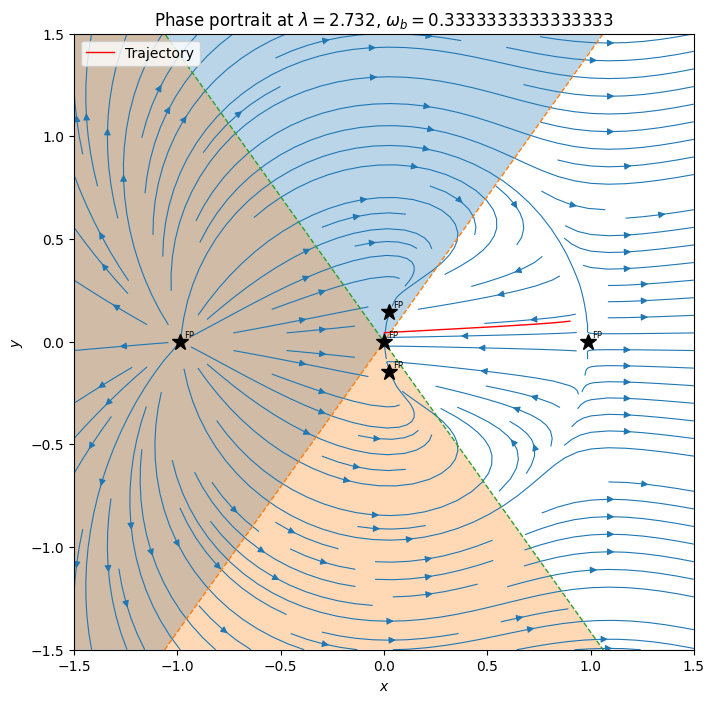

Plot of phase portrait xy at λ=70.1968
Physical fixed points: [[-0.9865765724632495, 0.0], [0.0, 0.0], [0.0009305528156002447, -0.005621862448365034], [0.0009305528156002447, 0.005621862448365034], [0.9865765724632495, 0.0]]


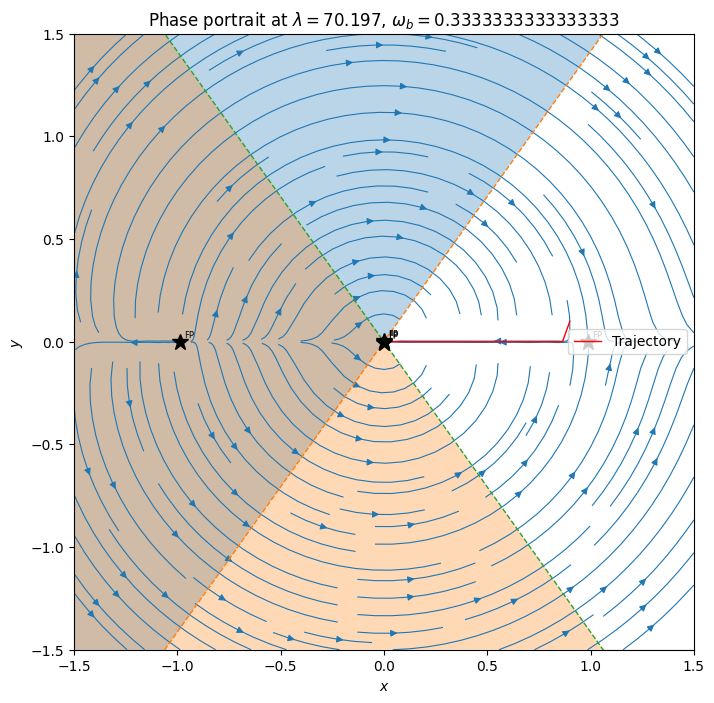

Plot of phase portrait xy at λ=-1.2927
Physical fixed points: [[-0.9865765724632495, 0.0], [-0.4711296380175911, -0.8190130390194934], [-0.4711296380175911, 0.8190130390194934], [-0.05660154767353223, -0.3225690172636364], [-0.05660154767353223, 0.3225690172636364], [0.0, 0.0], [0.9865765724632495, 0.0]]


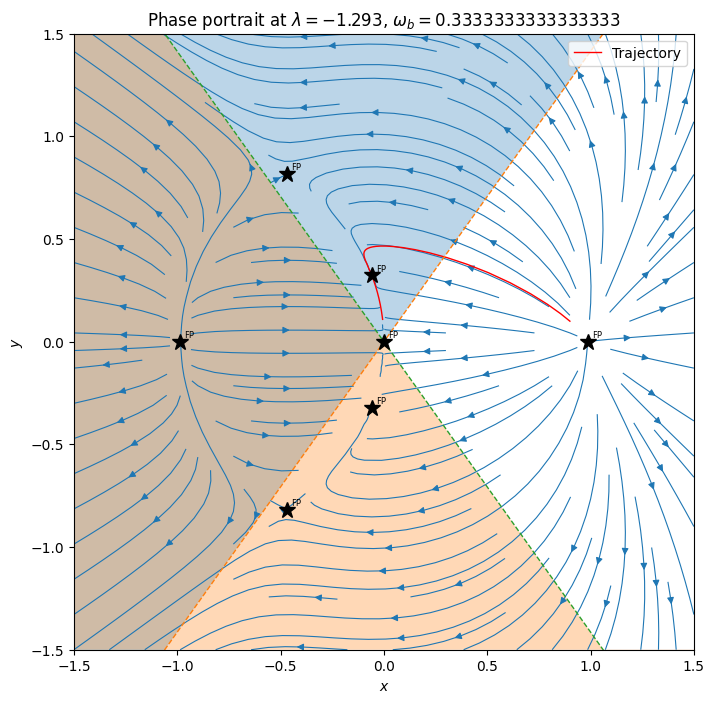

Plot of phase portrait xy at λ=-0.4089
Physical fixed points: [[-0.9865765724632495, 0.0], [0.0, 0.0], [0.9865765724632495, 0.0]]


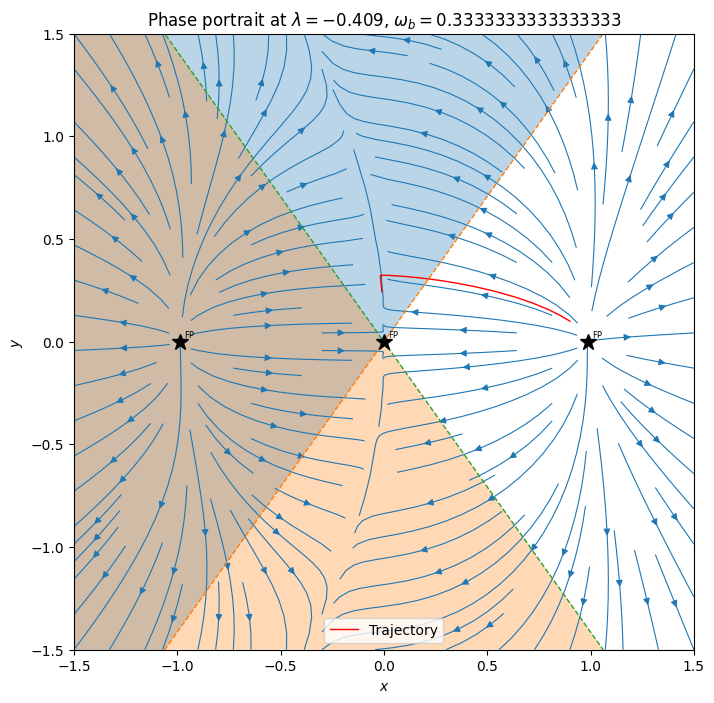

Plot of phase portrait xy at λ=-0.1544
Physical fixed points: [[-0.9865765724632495, 0.0], [0.0, 0.0], [0.9865765724632495, 0.0]]


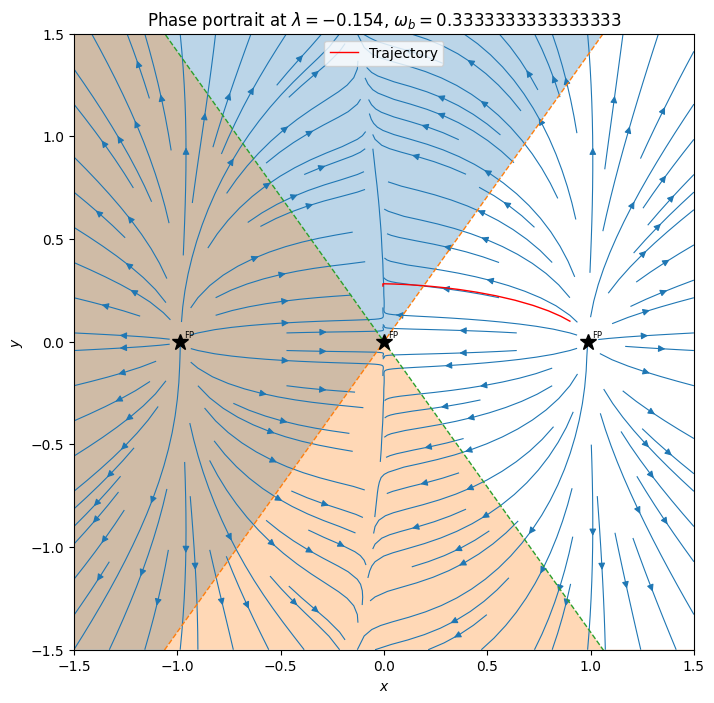

Plot of phase portrait xy at λ=-0.0665
Physical fixed points: [[-0.9865765724632495, 0.0], [0.0, 0.0], [0.9865765724632495, 0.0]]


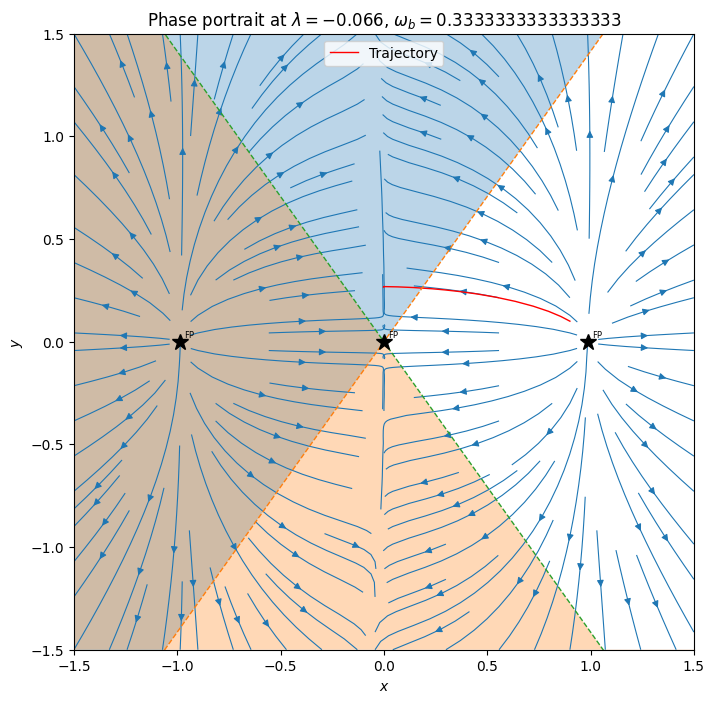

Plot of phase portrait xy at λ=-0.0287
Physical fixed points: [[-0.9865765724632495, 0.0], [0.0, 0.0], [0.9865765724632495, 0.0]]


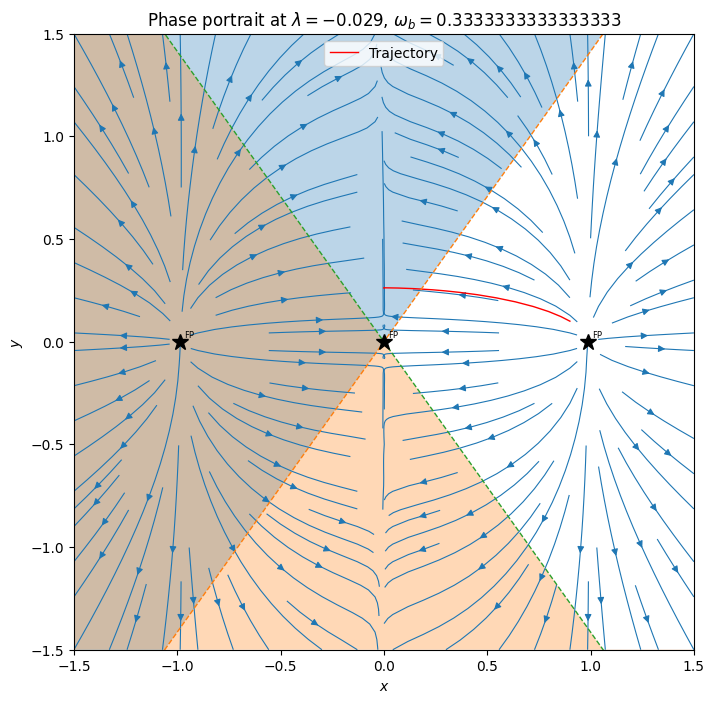

In [8]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ----------------------
# Parameters
# ----------------------
wb = 1/3  # radiation era (can change to 0 for matter/inflation)
phi = np.linspace(-1,5,100)
V0 = 1
V = V0*(1 - np.exp(-np.sqrt(2/3)*phi))**2 
z0 = 0.2  # initial barotropic fluid fraction

# ----------------------
# Lambda slices from gradient
# ----------------------
def get_graph_gradients(phi, V, n=7):
    all_grads = np.gradient(V, phi)
    indices = np.linspace(0, len(phi) - 1, n, dtype=int)
    phi_points = phi[indices]
    V_points = V[indices]
    grad_values = all_grads[indices]
    return phi_points, V_points, grad_values

phi_pts, V_pts, grads = get_graph_gradients(phi, V)
lam_slices = [-m/V_ for m, V_ in zip(grads, V_pts)]
print("Lambda slices:", lam_slices)

# ----------------------
# Full 3D dynamics
# ----------------------
def dynamicsStateSpace_lamfixed(x, y, z, lam):
    dx = -3*x + np.sqrt(3/2)*lam*y**2 + 1.5*x*(2*x**2 + (1+wb)*z**2)
    dy = -np.sqrt(3/2)*lam*x*y + 1.5*y*(2*x**2 + (1+wb)*z**2)
    dz = -1.5*(1+wb)*z + 1.5*z*(2*x**2 + (1+wb)*z**2)
    return dx, dy, dz

# Wrapper for odeint
def ode_wrapper(X, N, lam):
    x, y, z = X
    dx, dy, dz = dynamicsStateSpace_lamfixed(x, y, z, lam)
    return [dx, dy, dz]

# ----------------------
# Phase portrait plotting
# ----------------------
def phase_plot_at_lam(lam_slice, initialState, simulationTime=np.linspace(0,50,600)):
    # Integrate the system
    solutionState = odeint(ode_wrapper, initialState, simulationTime, args=(lam_slice,), rtol=1e-10, atol=1e-10, mxstep=500)
    x_vals, y_vals, z_vals = solutionState.T

    print(f"Plot of phase portrait xy at λ={lam_slice:.4f}")

    # Vector field grid
    x0 = np.linspace(-1.5, 1.5, 50)
    x1 = np.linspace(-1.5, 1.5, 50)
    X0, X1 = np.meshgrid(x0, x1)
    dX0 = np.zeros(X0.shape)
    dX1 = np.zeros(X1.shape)

    for i in range(X0.shape[0]):
        for j in range(X0.shape[1]):
            # Choose z = z0 for vector field slice
            dx, dy, _ = dynamicsStateSpace_lamfixed(X0[i,j], X1[i,j], z0, lam_slice)
            dX0[i,j] = dx
            dX1[i,j] = dy

    # Symbolic fixed points
    x_FP, y_FP, z_FP = sp.symbols('x y z', real=True)
    f = -3*x_FP + sp.sqrt(3/2)*lam_slice*y_FP**2 + 1.5*x_FP*(2*x_FP**2 + (1+wb)*z_FP**2)
    g = -sp.sqrt(3/2)*lam_slice*x_FP*y_FP + 1.5*y_FP*(2*x_FP**2 + (1+wb)*z_FP**2)
    # Solve with z=z0
    solutions = sp.solve([f.subs(z_FP,z0), g.subs(z_FP,z0)], [x_FP, y_FP], dict=True)
    FP = []
    for sol in solutions:
        if x_FP in sol and y_FP in sol:
            x_val = float(sol[x_FP])
            y_val = float(sol[y_FP])
            if x_val**2 + y_val**2 <= 1.5:
                FP.append([x_val, y_val])
    print("Physical fixed points:", FP)

    # Plot
    plt.figure(figsize=(8,8))
    plt.streamplot(X0, X1, dX0, dX1, density=1.2, linewidth=0.8)
    plt.plot(x_vals, y_vals, 'r', lw=1, label='Trajectory')

    # Eternal acceleration barrier
    xs = np.linspace(-1.5, 1.5, 100)
    y_plus = np.sqrt(2)*xs
    y_minus = -np.sqrt(2)*xs
    plt.plot(xs, y_plus, '--', lw=1)
    plt.plot(xs, y_minus, '--', lw=1)
    plt.fill_between(xs, y_plus, 1.5, alpha=0.3)
    plt.fill_between(xs, -1.5, y_minus, alpha=0.3)

    # Fixed points
    for x_c, y_c in FP:
        plt.plot(x_c, y_c, 'k*', markersize=12)
        plt.text(x_c+0.02, y_c+0.02, "FP", fontsize=6)

    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.title(rf"Phase portrait at $\lambda={lam_slice:.3f}$, $\omega_b={wb}$")
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()


# ----------------------
# Run plots for all lambda slices
# ----------------------
initialState = np.array([0.9, 0.1, z0])
for lam_slice in lam_slices:
    phase_plot_at_lam(lam_slice, initialState)


Lambda slices: [np.float64(2.7316515827212666), np.float64(70.1968189899742), np.float64(-1.2926721262972076), np.float64(-0.4088960783619053), np.float64(-0.1543567831485431), np.float64(-0.0664988661023732), np.float64(-0.02870598126706725)]


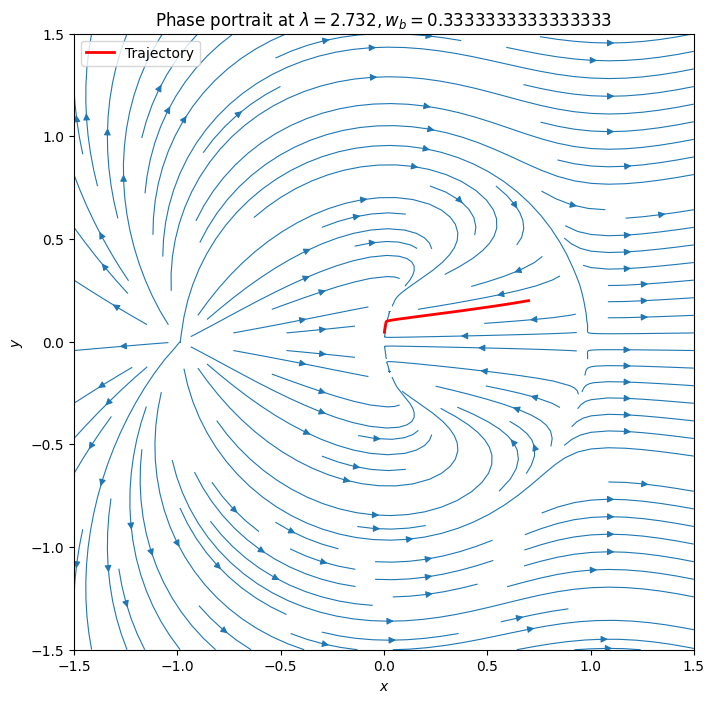

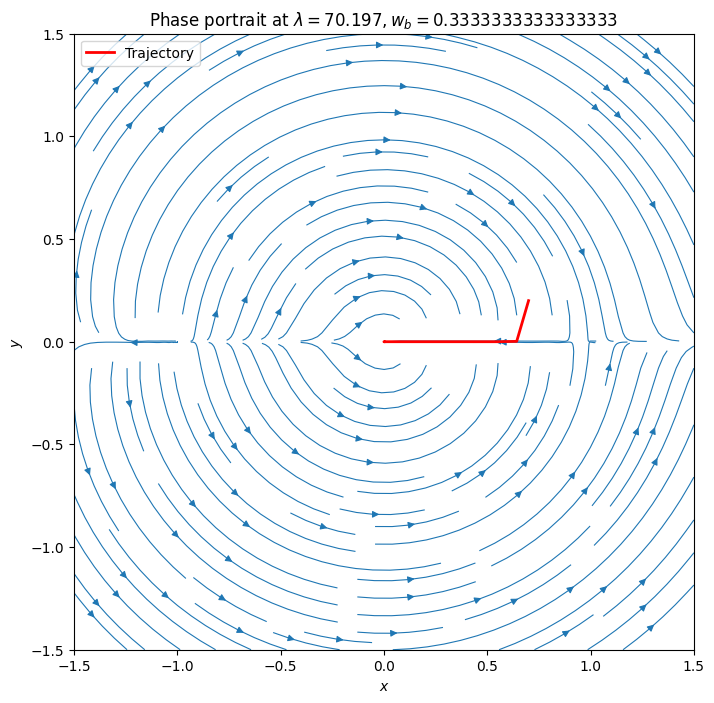

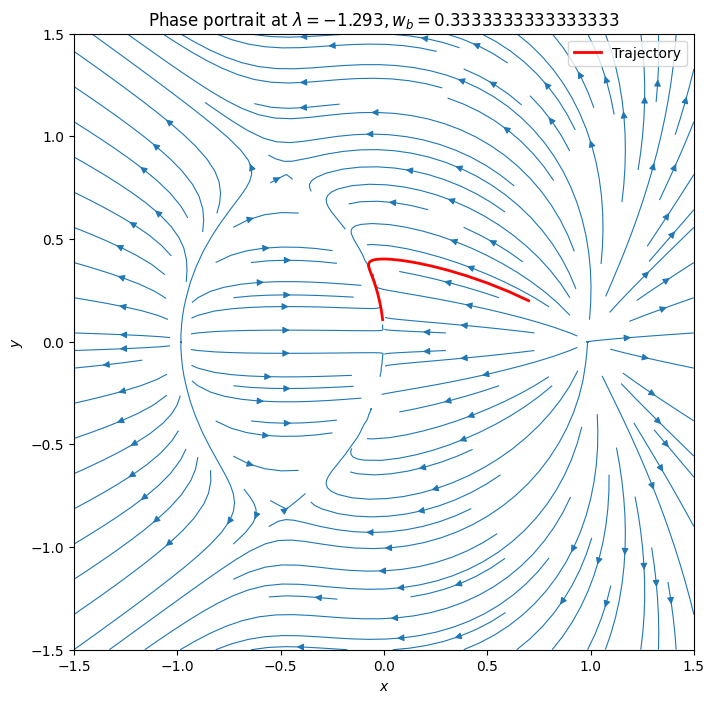

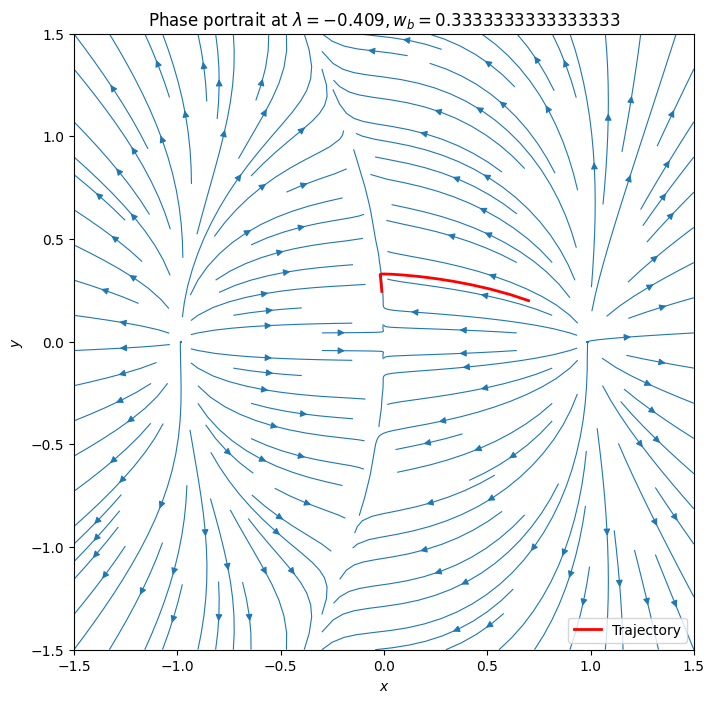

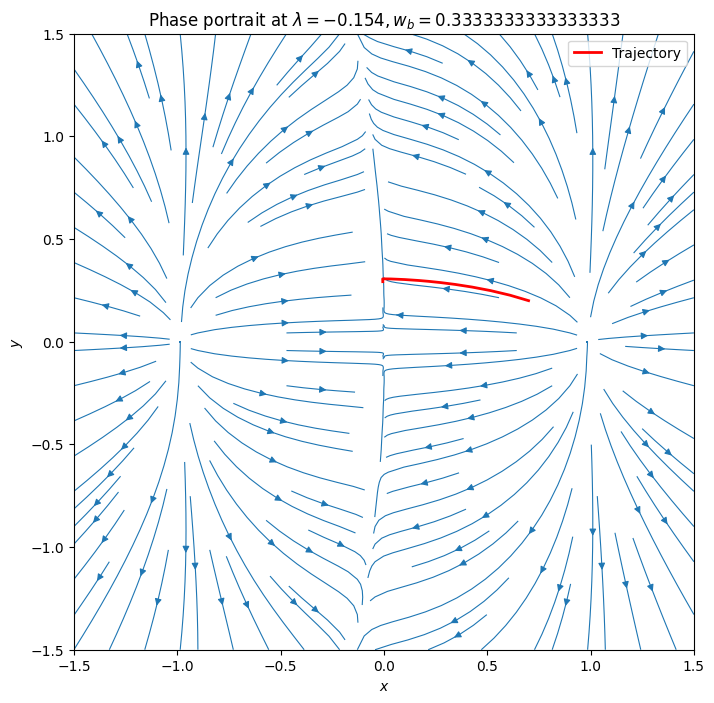

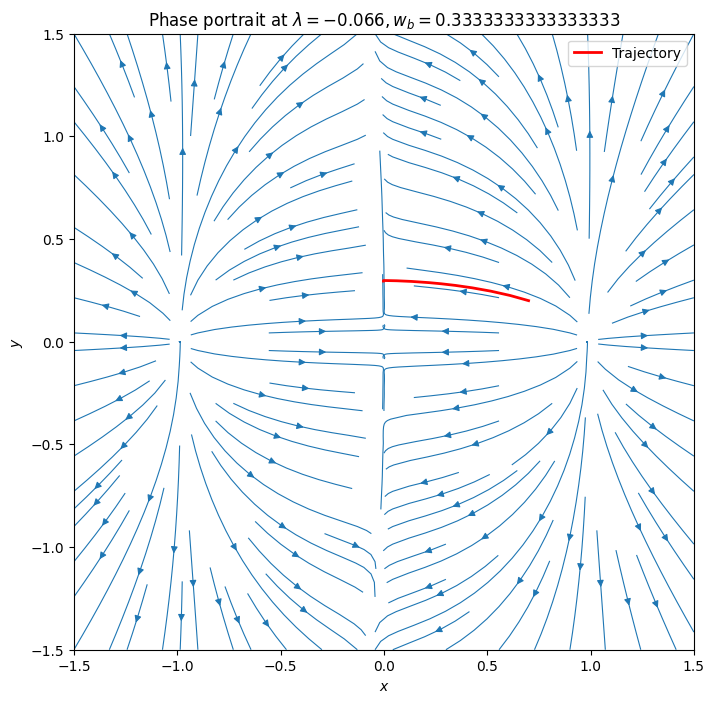

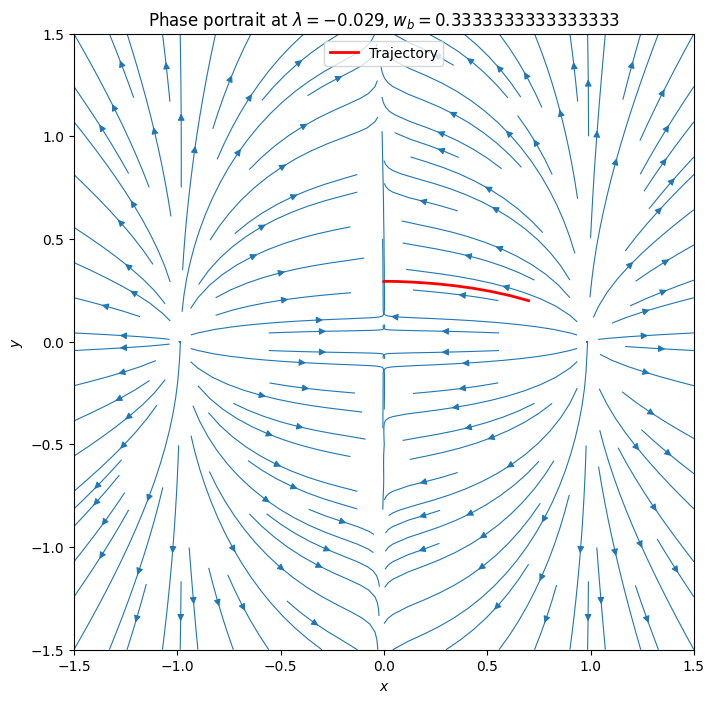

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import odeint

# ===============================
# Parameters
# ===============================
wb = 1/3  # radiation example
phi = np.linspace(-1,5,100)
V0 = 1
V = V0*(1-np.exp(-np.sqrt(2/3)*phi))**2 
z0 = 0.2   # initial fluid fraction

def get_graph_gradients(phi, V, n=7):
    all_grads = np.gradient(V, phi)
    indices = np.linspace(0, len(phi)-1, n, dtype=int)
    phi_points = phi[indices]
    V_points = V[indices]
    grad_values = all_grads[indices]
    return phi_points, V_points, grad_values

phi_pts, V_pts, grads = get_graph_gradients(phi, V)
lam_slices = []
for phi_val, V_val, m in zip(phi_pts, V_pts, grads):
    lam_val = -m/V_val
    lam_slices.append(lam_val)
print("Lambda slices:", lam_slices)

# ===============================
# Dynamical system including z
# ===============================
def Gamma(lam):
    lam = max(lam, 1e-6)
    return 1 - 0.5*((lam + 2*np.sqrt(2/3))/lam)

def dynamicsStateSpace(x, y, z, lam):
    dx = -3*x + np.sqrt(3/2)*lam*y**2 + 1.5*x*(2*x**2 + (1+wb)*z**2)
    dy = -np.sqrt(3/2)*lam*x*y + 1.5*y*(2*x**2 + (1+wb)*z**2)
    dz = -1.5*(1+wb)*z + 1.5*z*(2*x**2 + (1+wb)*z**2)
    return [dx, dy, dz]

# ===============================
# Phase plot function
# ===============================
initialState = [0.7, 0.2, z0]  # x0, y0, z0
simulationTime = np.linspace(0, 50, 600)

def phase_plot_at_lam(lam_slice, initialState):
    solution = odeint(lambda X, N: dynamicsStateSpace(X[0], X[1], X[2], lam_slice),
                      initialState, simulationTime)
    x_vals, y_vals, z_vals = solution.T

    # Vector field for x-y plane
    x0 = np.linspace(-1.5, 1.5, 50)
    y0 = np.linspace(-1.5, 1.5, 50)
    X0, Y0 = np.meshgrid(x0, y0)
    dX, dY = np.zeros_like(X0), np.zeros_like(Y0)

    for i in range(X0.shape[0]):
        for j in range(X0.shape[1]):
            # Use z = current initial z0 for vector field slice
            dx, dy, dz = dynamicsStateSpace(X0[i,j], Y0[i,j], z0, lam_slice)
            dX[i,j] = dx
            dY[i,j] = dy

    # Plot phase portrait
    plt.figure(figsize=(8,8))
    plt.streamplot(X0, Y0, dX, dY, density=1.2, linewidth=0.8)
    plt.plot(x_vals, y_vals, 'r', lw=2, label='Trajectory')
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.title(rf"Phase portrait at $\lambda={lam_slice:.3f}, w_b={wb}$")
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()

# ===============================
# Run plots for all lambda slices
# ===============================
for lam_slice in lam_slices:
    phase_plot_at_lam(lam_slice, initialState)


Lambda slices: [np.float64(2.7316515827212666), np.float64(70.1968189899742), np.float64(-1.2926721262972076), np.float64(-0.4088960783619053), np.float64(-0.1543567831485431), np.float64(-0.0664988661023732), np.float64(-0.02870598126706725)]
Phase portrait xy at lambda=2.7317


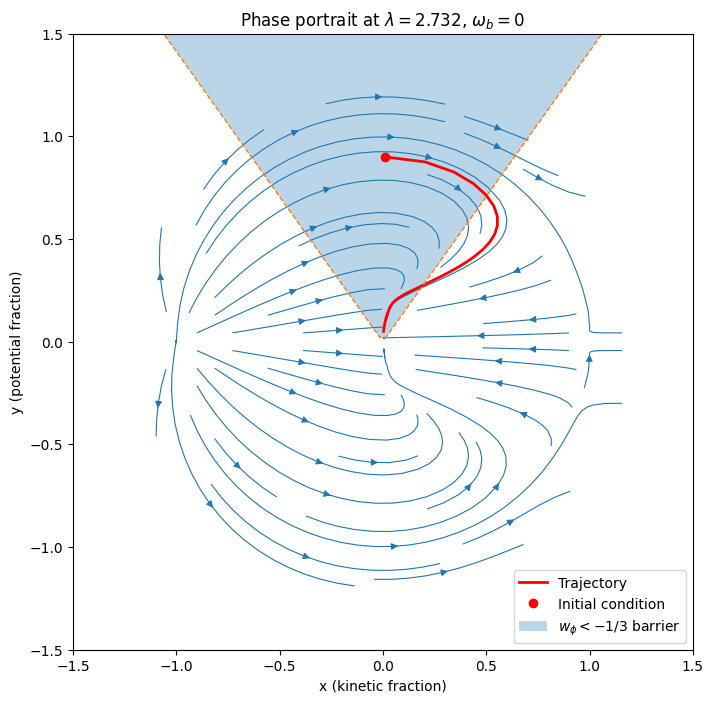

Phase portrait xy at lambda=70.1968


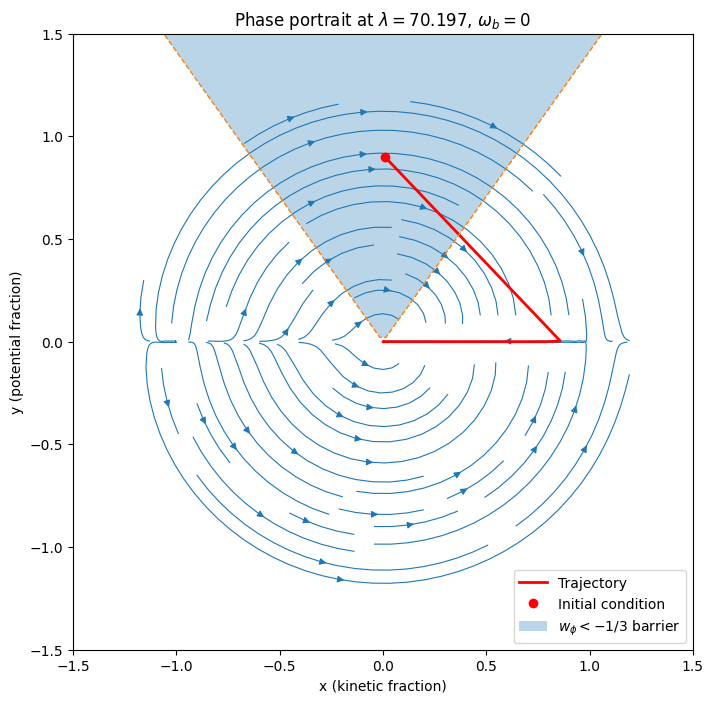

Phase portrait xy at lambda=-1.2927


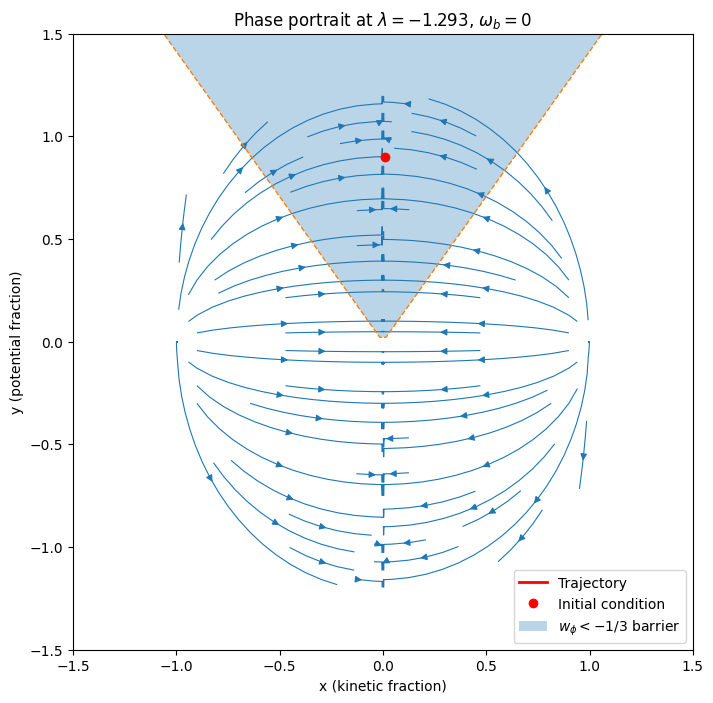

Phase portrait xy at lambda=-0.4089


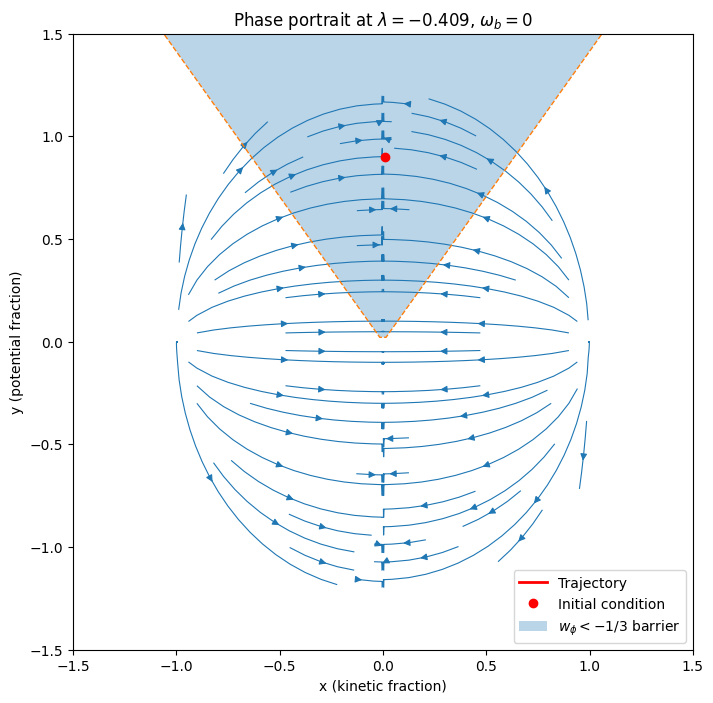

Phase portrait xy at lambda=-0.1544


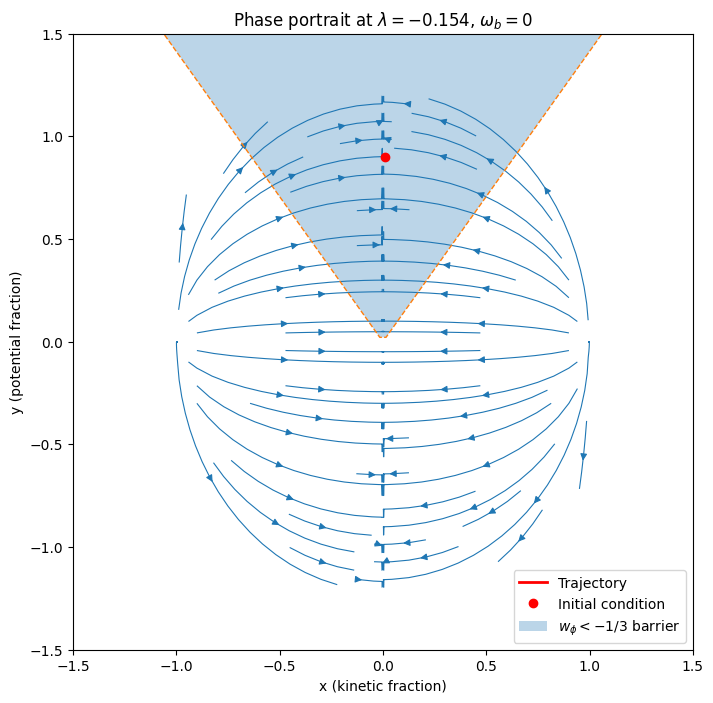

Phase portrait xy at lambda=-0.0665


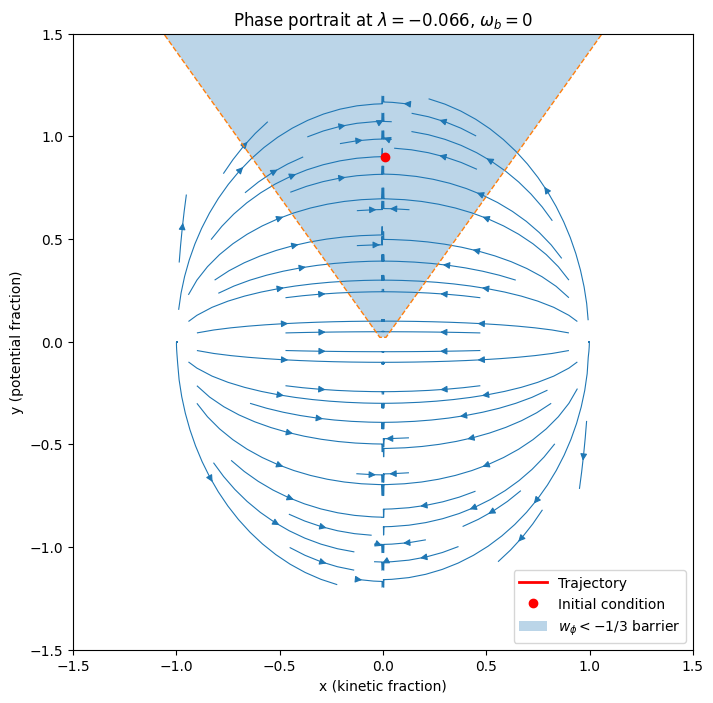

Phase portrait xy at lambda=-0.0287


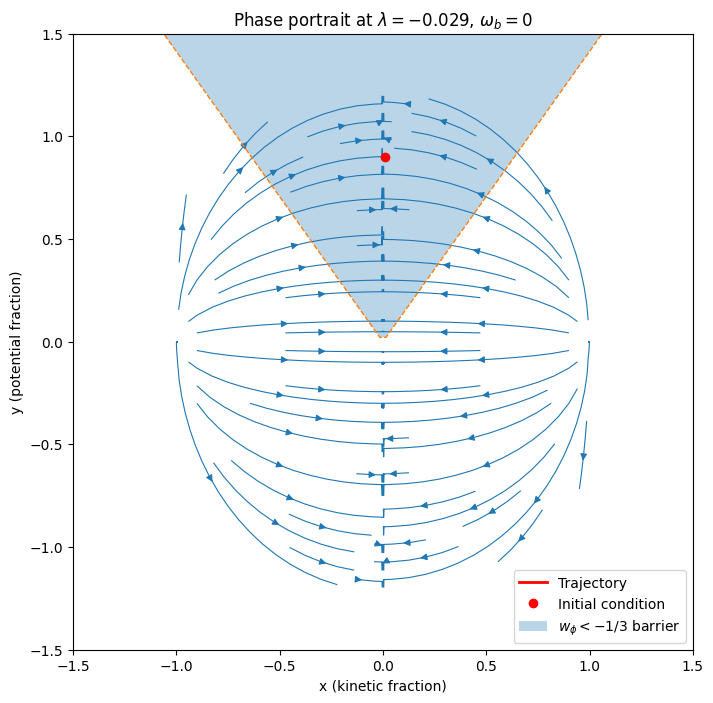

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp

# -----------------------------
# 1️⃣ Define potential and lambda slices
# -----------------------------
phi = np.linspace(-1,5,100)
V_0= 1
V = V_0*(1-np.exp(-((2/3)**0.5)*phi))**2 

def get_graph_gradients(phi, V, n=7):
    all_grads = np.gradient(V, phi)
    indices = np.linspace(0, len(phi) - 1, n, dtype=int)
    
    phi_points = phi[indices]
    V_points = V[indices]
    grad_values = all_grads[indices]
    
    return phi_points, V_points, grad_values

phi_pts, V_pts, grads = get_graph_gradients(phi, V)
lam_slices = []

for phi_val, V_val, m in zip(phi_pts, V_pts, grads):
    lam_val = -m / V_val
    lam_slices.append(lam_val)
print("Lambda slices:", lam_slices)

# -----------------------------
# 2️⃣ Define dynamics functions
# -----------------------------
wb = 0  # scalar dominated era
z0 = 0  # freeze z to simplify 2D plot

def Gamma(lam):
    lam = max(lam, 1e-6)
    return 1 - 0.5*((lam + 2*np.sqrt(2/3))/lam)

def dynamicsStateSpace(x, y, z, lam):
    lam = max(lam, 1e-6)
    dx = -3*x + np.sqrt(3/2)*lam*y**2 + 1.5*x*(2*x**2 + (1+wb)*z**2)
    dy = -np.sqrt(3/2)*x*y*lam + 1.5*y*(2*x**2 + (1+wb)*z**2)
    dz = -3/2*(1+wb)*z + 3/2*z*(2*x**2 + (1+wb)*z**2)
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)
    return [dx, dy, dz, dlam]

def dynamics_odeint(X, N, lam_fixed):
    x, y, z, _ = X
    dx, dy, dz, dlam = dynamicsStateSpace(x, y, z, lam_fixed)
    return [dx, dy, dz, dlam]

# -----------------------------
# 3️⃣ Phase portrait function at fixed lambda slice
# -----------------------------
def phase_plot_at_lam(lam_slice, initialState):
    print(rf"Phase portrait xy at lambda={lam_slice:.4f}")
    simulationTime = np.linspace(0, 50, 600)
    solutionState = odeint(dynamics_odeint, initialState, simulationTime, args=(lam_slice,))
    x_vals, y_vals = solutionState[:,0], solutionState[:,1]

    # Vector field for streamplot
    x0 = np.linspace(-1.5, 1.5, 100)
    y0 = np.linspace(-1.5, 1.5, 100)
    X0, Y0 = np.meshgrid(x0, y0)
    dX0 = np.zeros(X0.shape)
    dY0 = np.zeros(Y0.shape)
    for i in range(X0.shape[0]):
        for j in range(X0.shape[1]):
            if X0[i,j]**2 + Y0[i,j]**2 <= 1.5:
                dx, dy, _, _ = dynamicsStateSpace(X0[i,j], Y0[i,j], z0, lam_slice)
                dX0[i,j] = dx
                dY0[i,j] = dy
            else:
                dX0[i,j] = np.nan
                dY0[i,j] = np.nan

    plt.figure(figsize=(8,8))
    plt.streamplot(X0, Y0, dX0, dY0, density=1.2, linewidth=0.8)
    plt.plot(x_vals, y_vals, 'r', lw=2, label='Trajectory')
    plt.plot(x_vals[0], y_vals[0], 'ro', label='Initial condition')

    # Eternal acceleration barrier: y = sqrt(2)|x|
    xs = np.linspace(-1.5, 1.5, 100)
    ys = np.sqrt(2)*np.abs(xs)
    plt.plot(xs, ys, '--', lw=1)
    plt.fill_between(xs, ys, 1.5, alpha=0.3, label=r"$w_\phi < -1/3$ barrier")

    plt.xlabel("x (kinetic fraction)")
    plt.ylabel("y (potential fraction)")
    plt.title(rf"Phase portrait at $\lambda={lam_slice:.3f}$, $\omega_b={wb}$")
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()

# -----------------------------
# 4️⃣ Loop over lambda slices
# -----------------------------
initialState = [0.01, 0.9, z0, 0.5]  # choose a physically reasonable starting point

for lam_slice in lam_slices:
    phase_plot_at_lam(lam_slice, initialState)


In [11]:
for fp in FP:
    x_c, y_c = fp
    J_num = np.array(J_sym.subs({x_FP: x_c, y_FP: y_c, lam_FP: lam_slice, z_FP: z0}), dtype=float)
    eigvals, eigvecs = np.linalg.eig(J_num)
    stability, point_type = classify_FP(eigvals)
    
    plt.plot(x_c, y_c, 'k*', markersize=12)
    plt.text(x_c + 0.02, y_c + 0.02, f"{point_type}\n{stability}", fontsize=5)

    # Plot separatrices for saddle points
    if stability == 'saddle':
        delta = 1e-5  # small step along eigenvector
        for vec, val in zip(eigvecs.T, eigvals):
            if val > 0:  # only unstable directions
                for pm in [-1, 1]:
                    x_start = np.array([x_c, y_c]) + pm * delta * vec[:2]
                    trajectory = odeint(
                        lambda X, N: dynamicsStateSpace(X[0], X[1], z0, lam_slice)[:2],
                        x_start,
                        np.linspace(0, 50, 500)
                    )
                    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r--', linewidth=1, label='Separatrix')

# After plotting all separatrices, add a single legend entry
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


NameError: name 'FP' is not defined